<a href="https://colab.research.google.com/github/dton24/PortfolioProjects/blob/main/2024_ITC_Competition_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Combine all datasets, then get a random sample from the cumulative dataset.

Read each dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('/content/202101-divvy-tripdata.csv')
#df2 = pd.read_csv('/content/202102-divvy-tripdata.csv')
#df3 = pd.read_csv('/content/202103-divvy-tripdata.csv')
#df4 = pd.read_csv('/content/202104-divvy-tripdata.csv')
#df5 = pd.read_csv('/content/202105-divvy-tripdata.csv')
#df6 = pd.read_csv('/content/202106-divvy-tripdata.csv')
#df7 = pd.read_csv('/content/202107-divvy-tripdata.csv')
#df8 = pd.read_csv('/content/202108-divvy-tripdata.csv')
#df9 = pd.read_csv('/content/202109-divvy-tripdata.csv')
#df10 = pd.read_csv('/content/202110-divvy-tripdata.csv')
#df11 = pd.read_csv('/content/202111-divvy-tripdata.csv')
#df12 = pd.read_csv('/content/202112-divvy-tripdata.csv')



Combine all of the datasets into one dataframe

In [ ]:
#fulldf = pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

Look at how large the new dataframe is

In [ ]:
#fulldf.shape

Drop Duplicate rows and Null values

In [ ]:
#fulldf = fulldf.dropna()
#fulldf = fulldf.drop_duplicates(subset = 'ride_id')

In [ ]:
#fulldf.isna().sum()

This is our sampled dataframe we will be using. **A 10% sample out of over 5,544,112 records would have a margin of error of less than 1% and a confidence interval of >99%. Our sample would be very accurate relative to the entire data**

Take a sample of 10% of the data and use that to create our new dataframe.

In [ ]:
# To sample 10% of the DataFrame without replacement
#sampled_df = fulldf.sample(frac=0.1, replace=False)

In [ ]:
#sampled_df.shape

In [ ]:
# Define the file path where you want to save the CSV.
#csv_file_path = '/content/sampled_df.csv'

# Save the DataFrame to a CSV file.
#df.to_csv(csv_file_path, index=False)

# Return the path for the user to download
#csv_file_path

## Manipulation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('sampled_df.xlsx')

**Drop Duplicates and NULL Values**

In [ ]:
df = df.dropna()
df = df.drop_duplicates(subset = 'ride_id')
df.shape

(450560, 13)

**Create a duration column**

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate the duration as the difference between 'ended_at' and 'started_at'
df['duration_in_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes
0,FD67F82A4DA35E9A,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,13179,Wilton Ave & Diversey Pkwy,TA1306000014,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667
1,E91B82A9F41F29D2,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,TA1306000032,Clark St & Randolph St,TA1305000030,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667
2,39B0A666B963FBFF,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,13144,Southport Ave & Clybourn Ave,TA1309000030,41.943400,-87.679673,41.920897,-87.663686,member,11.433333
3,86F463BC75C7FE39,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,TA1305000006,Wabash Ave & Roosevelt Rd,TA1305000002,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667
4,D315A21A8B492815,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,13036,Streeter Dr & Grand Ave,13022,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333


**Create a new column 'path' that is a tuple containing the start point and the end point**

In [ ]:
df['path'] = list(zip(df['start_station_name'], df['end_station_name']))

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path
0,FD67F82A4DA35E9A,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,13179,Wilton Ave & Diversey Pkwy,TA1306000014,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey..."
1,E91B82A9F41F29D2,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,TA1306000032,Clark St & Randolph St,TA1305000030,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp..."
2,39B0A666B963FBFF,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,13144,Southport Ave & Clybourn Ave,TA1309000030,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo..."
3,86F463BC75C7FE39,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,TA1305000006,Wabash Ave & Roosevelt Rd,TA1305000002,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve..."
4,D315A21A8B492815,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,13036,Streeter Dr & Grand Ave,13022,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran..."


**Drop unnecessary columns**

In [ ]:
df = df.drop(columns = ['ride_id',	'start_station_id', 'end_station_id'])

**Add month, year, and time columns**

In [ ]:
# Assuming df is your existing DataFrame with the 'started_at' column already in datetime format

# Add the 'month' and 'year' columns
df['month'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year

# Define a function to categorize times of day
def categorize_time_of_day(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    elif 17 <= time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'started_at' and 'ended_at' columns
df['time_of_day_started'] = df['started_at'].apply(categorize_time_of_day)
df['time_of_day_ended'] = df['ended_at'].apply(categorize_time_of_day)

# Show the DataFrame with the new columns
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon


**Drop started_at and ended_at columns because it isn't necessary anymore after extraction**

In [ ]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon


**Cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


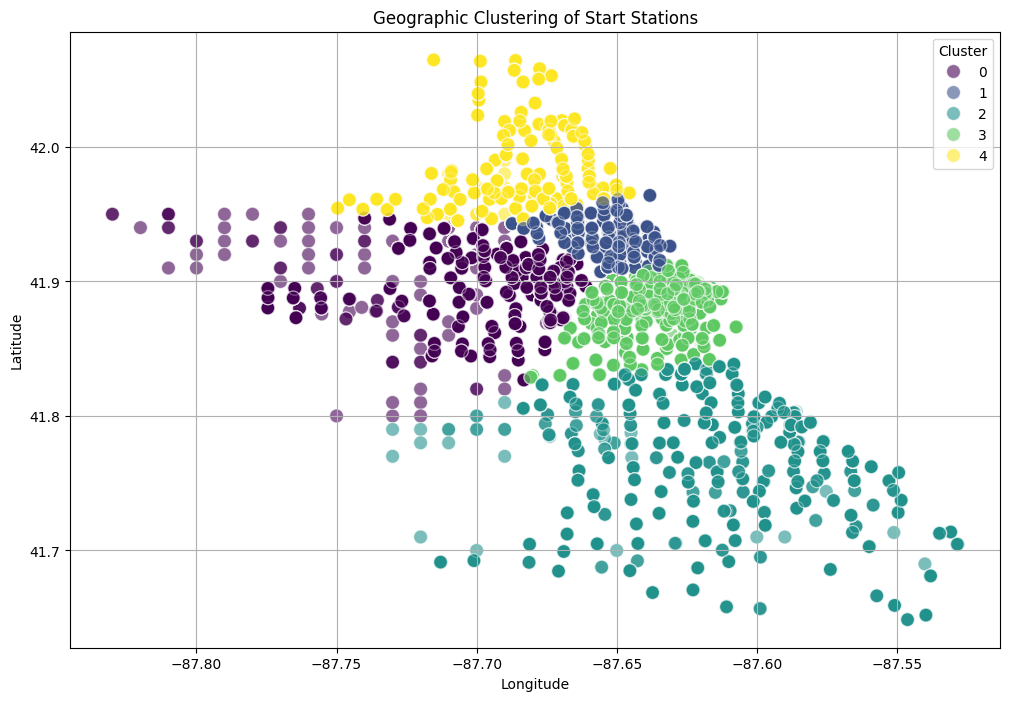

In [ ]:
from sklearn.cluster import KMeans


# Data cleaning: Removing rows where coordinates are missing
df = df.dropna(subset=['start_lat', 'start_lng'])

# Selecting unique station locations for clustering to avoid duplicate entries
stations = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Extracting the coordinates into a new DataFrame for clustering
station = stations[['start_lat', 'start_lng']]

# Define the number of clusters, let's try with 5 clusters initially
kmeans = KMeans(n_clusters=5, random_state=0).fit(station)

# Predict the clusters
labels = kmeans.predict(station)

# Attach the cluster labels back to the stations DataFrame
stations['cluster'] = labels

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_lng', y='start_lat', hue='cluster', data=stations, palette='viridis', s=100, alpha=0.6)
plt.title('Geographic Clustering of Start Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


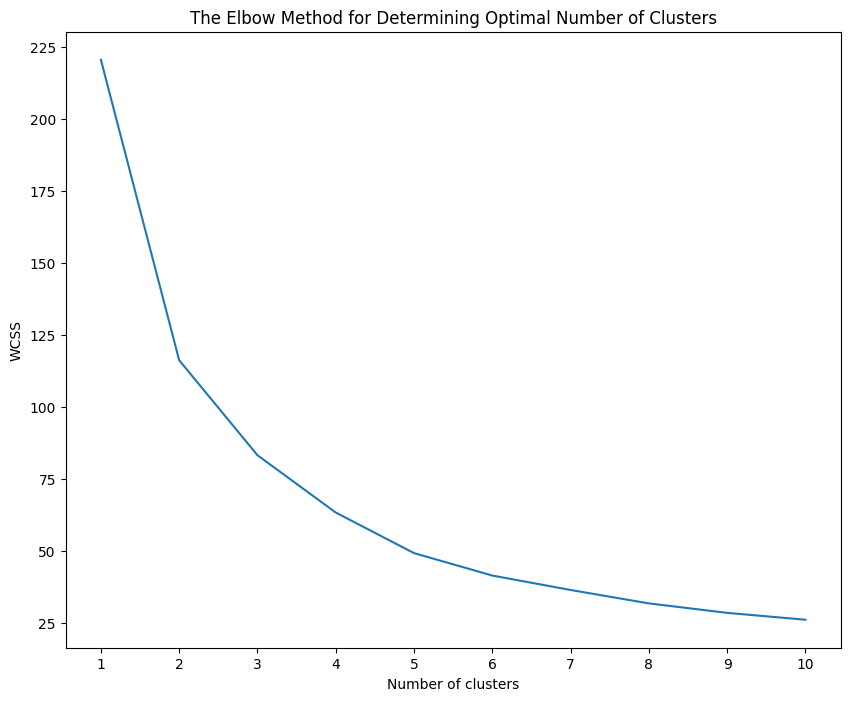

In [ ]:
# Extracting the coordinates into a new DataFrame for clustering
station = stations[['start_lat', 'start_lng']]

# Use the elbow method to find a good number of clusters using WCSS (Within-Cluster Sum of Squares)
wcss = []
for i in range(1, 11):  # Let's test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(station)
    wcss.append(kmeans.inertia_)

# Plot the results on a line graph to observe 'The Elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.xticks(range(1, 11))
plt.show()

In [ ]:
# Create a dictionary from stations DataFrame
cluster_map = stations.set_index('start_station_name')['cluster'].to_dict()

# Map the cluster labels onto the full DataFrame
df['cluster'] = df['start_station_name'].map(cluster_map)

In [ ]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning,1
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning,1
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon,1
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon,3
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon,3


**Make a day_of_week column**

In [ ]:
# Convert the 'started_at' column to datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')

# Drop any NaT values that were not converted successfully
df = df.dropna()

# Extract the day of the week and create a new column for it
df['day_of_week'] = df['started_at'].dt.day_name()

# Display the dataframe to verify results
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster,day_of_week
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning,1,Tuesday
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning,1,Tuesday
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon,1,Sunday
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon,3,Sunday
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon,3,Saturday


**Make a day_type column with weekends and weekdays**

In [ ]:
# Create a new column 'day_type' that labels Saturday and Sunday as 'Weekend' and the other days as 'Weekday'
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Display the updated dataframe to verify results
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster,day_of_week,day_type
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning,1,Tuesday,Weekday
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning,1,Tuesday,Weekday
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon,1,Sunday,Weekend
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon,3,Sunday,Weekend
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon,3,Saturday,Weekend


**Save this Manipulated DataFrame**

In [ ]:
# Define the file path where you want to save the CSV.
# excel_file_path = '/content/updated_df.xlsx'

# Save the DataFrame to a CSV file.
#df.to_excel(excel_file_path, index=False)

# Return the path for the user to download
#excel_file_path

'/content/updated_df.xlsx'

## Frequency Charts

In [ ]:
#df = pd.read_excel('updated_df.xlsx')

In [ ]:
#df.shape

(450560, 19)

In [ ]:
#pickle_file_path ='/content/sample_data/updated_df.pkl'
#df.to_pickle(pickle_file_path)
#pickle_file_path

'/content/sample_data/updated_df.pkl'

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
df.shape

(450560, 19)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Ride Type**

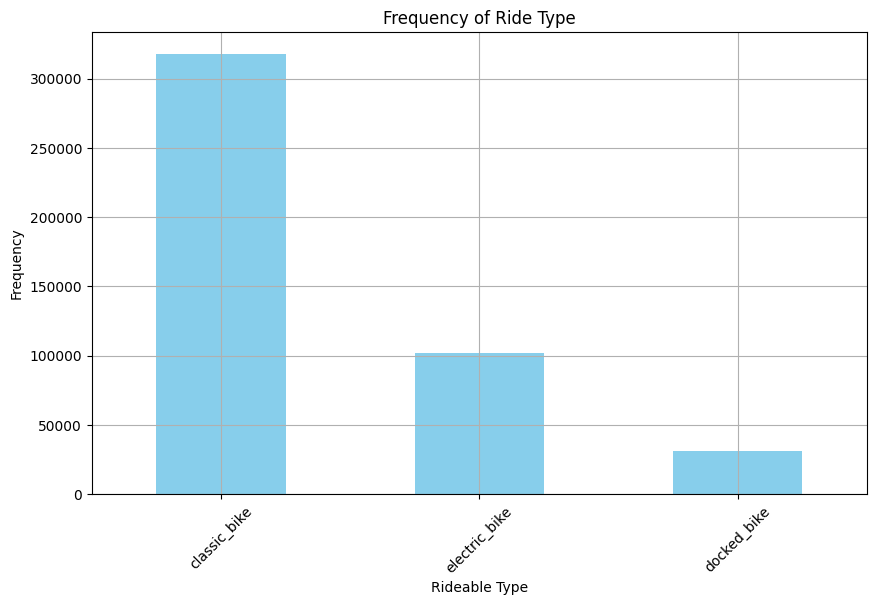

In [ ]:
# Calculating frequency of each month
month_frequency = df['rideable_type'].value_counts()

# Plotting the frequency chart
plt.figure(figsize=(10, 6))
month_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Ride Type')
plt.xlabel('Rideable Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Start Station**

*Let's first look at the number of unique start_stations*

In [ ]:
unique_station_count = df['start_station_name'].nunique()
unique_station_count

803

*Since there are 803 unique start stations, let's look at the top 15*

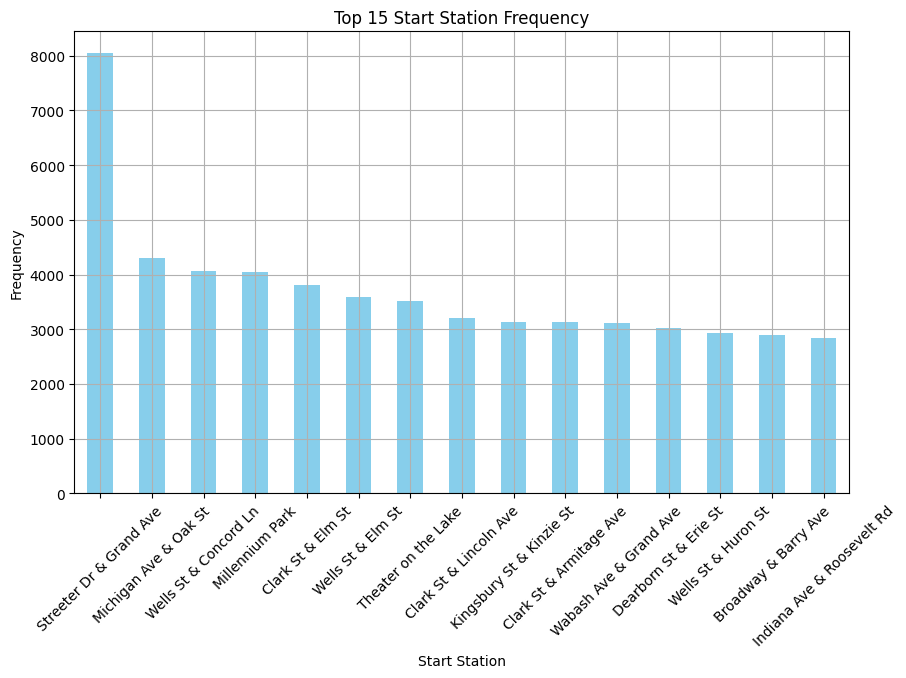

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each start station
start_station_frequency = df['start_station_name'].value_counts()

# Select the top 15
top_15_stations = start_station_frequency.head(15)

# Plotting the frequency chart for the top 15
plt.figure(figsize=(10, 6))
top_15_stations.plot(kind='bar', color='skyblue')
plt.title('Top 15 Start Station Frequency')
plt.xlabel('Start Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


*Now, let's look at the bottom 15*

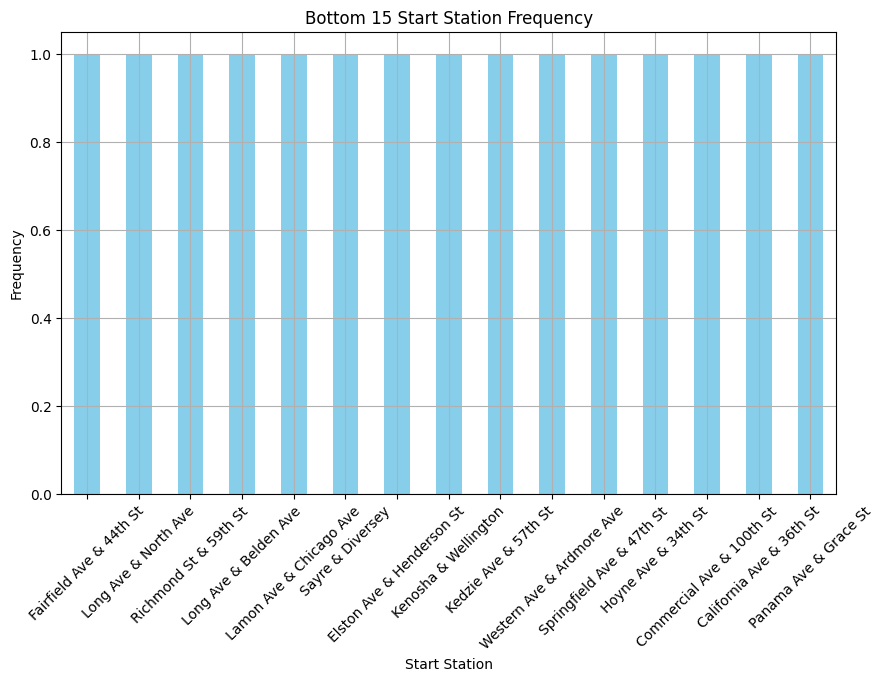

In [ ]:
import matplotlib.pyplot as plt

# Select the top 15
bottom_15_stations = start_station_frequency.tail(15)

# Plotting the frequency chart for the bottom 15
plt.figure(figsize=(10, 6))
bottom_15_stations.plot(kind='bar', color='skyblue')
plt.title('Bottom 15 Start Station Frequency')
plt.xlabel('Start Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**End Station**

In [ ]:
unique_end_station_count = df['end_station_name'].nunique()
unique_end_station_count

796

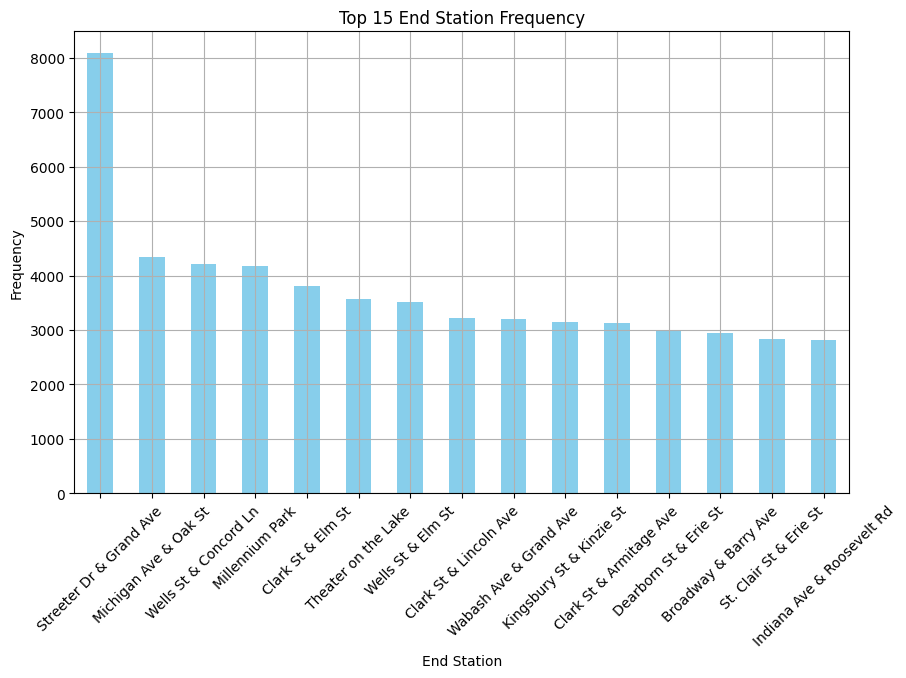

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each start station
end_station_frequency = df['end_station_name'].value_counts()

# Select the top 15
top_15_end_stations = end_station_frequency.head(15)

# Plotting the frequency chart for the top 15
plt.figure(figsize=(10, 6))
top_15_end_stations.plot(kind='bar', color='skyblue')
plt.title('Top 15 End Station Frequency')
plt.xlabel('End Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Path Frequency**

In [ ]:
# Let's look at the number of unique paths (start to end) that people take
df['path'].nunique()

77395

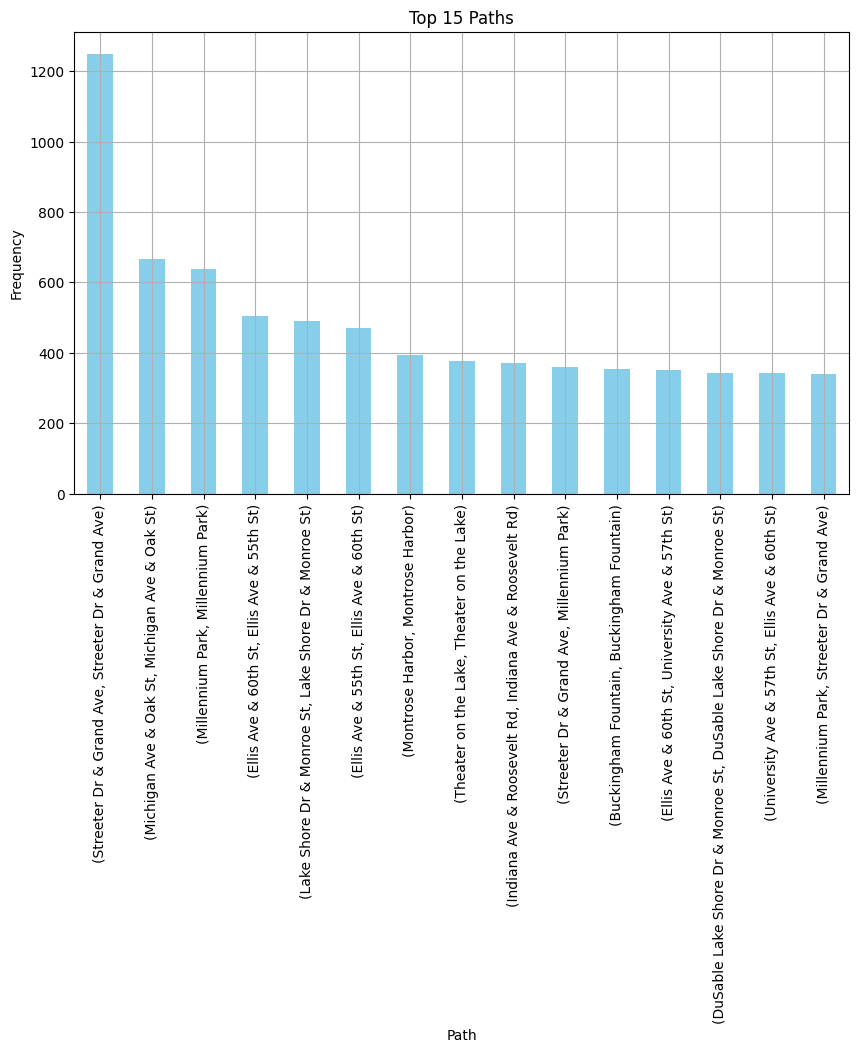

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each start station
path_frequency = df['path'].value_counts()

# Select the top 15
top_15_paths = path_frequency.head(15)

# Plotting the frequency chart for the top 15
plt.figure(figsize=(10, 6))
top_15_paths.plot(kind='bar', color='skyblue')
plt.title('Top 15 Paths')
plt.xlabel('Path')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


**Member vs. Casual**

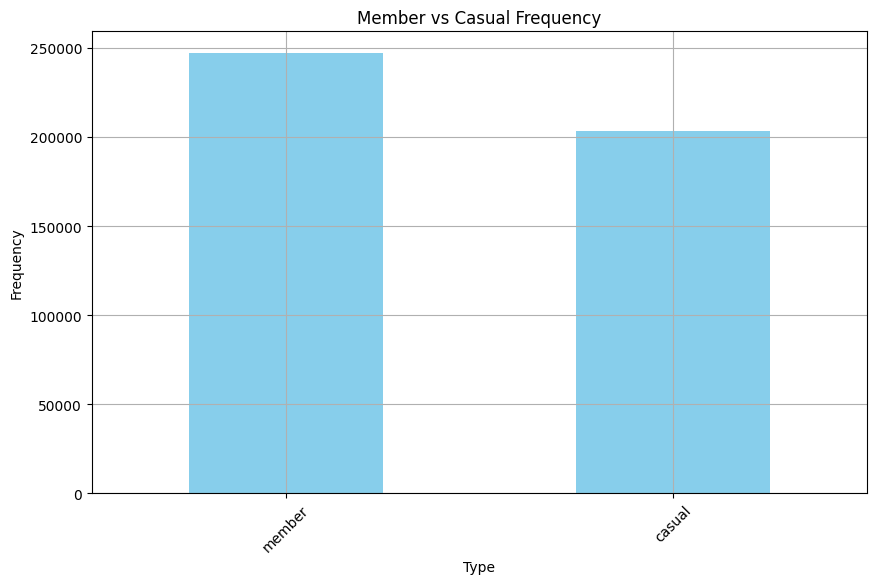

In [ ]:
# Calculate the frequency of each category
member_casual_frequency = df['member_casual'].value_counts()

# Plotting the frequency chart
plt.figure(figsize=(10, 6))
member_casual_frequency.plot(kind='bar', color='skyblue')
plt.title('Member vs Casual Frequency')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Month**

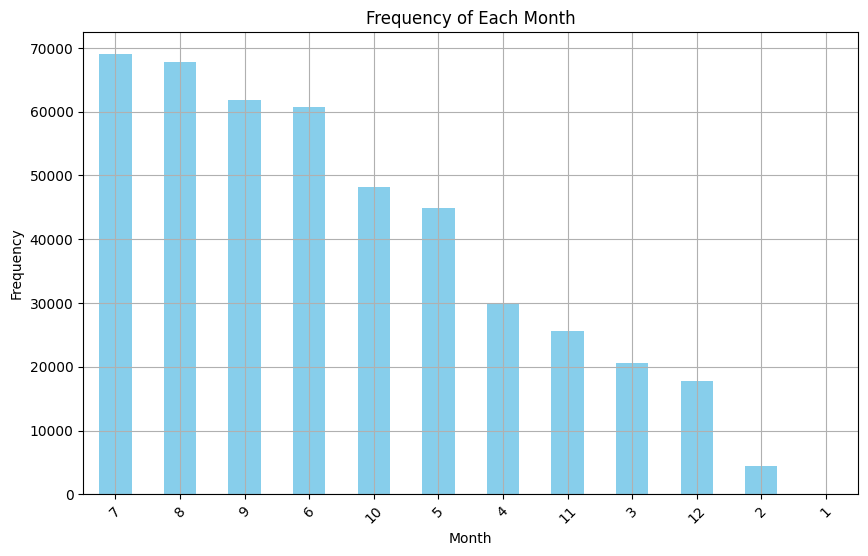

In [ ]:
# Calculating frequency of each month
month_frequency = df['month'].value_counts()

# Plotting the frequency chart
plt.figure(figsize=(10, 6))
month_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Time Series for Month*

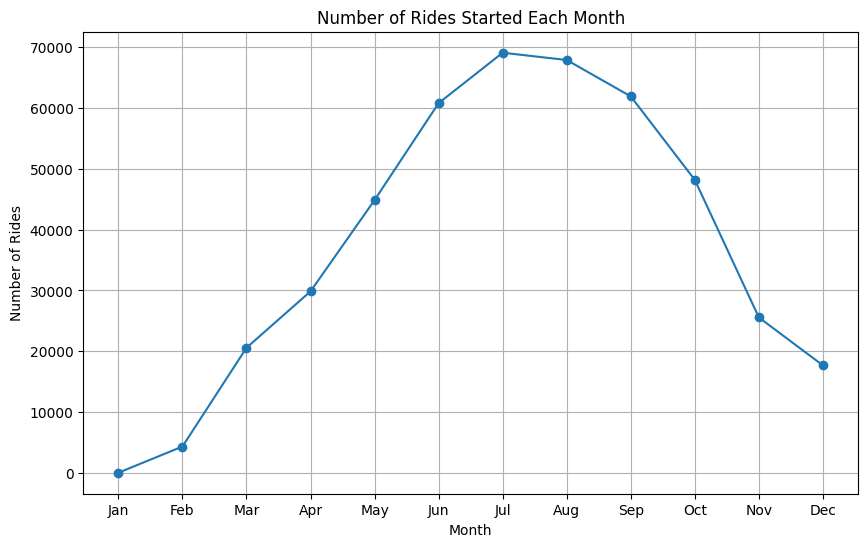

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Group by month and count the occurrences
monthly_counts = df.groupby('month').size()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Number of Rides Started Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


**Time of Day**

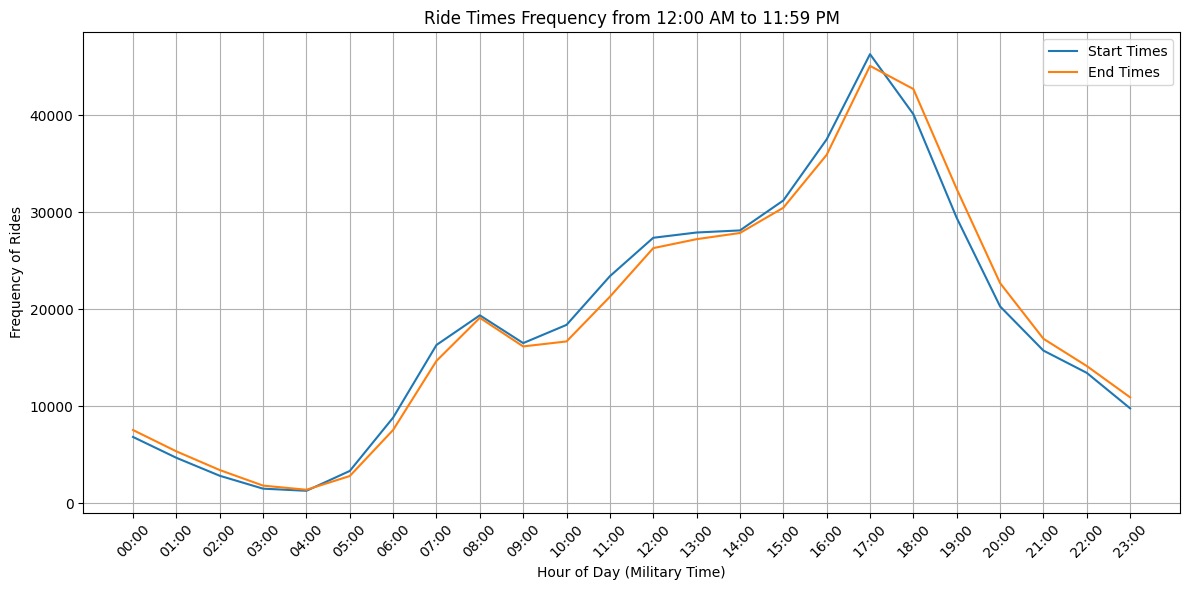

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'started_at' & 'ended_at' columns are datetime objects
# If not, you would need to convert them like this:
# df['started_at'] = pd.to_datetime(df['started_at'])
# df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extract the hour for both 'started_at' and 'ended_at'
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

# Group by the extracted hours and count frequencies
start_hours_freq = df['start_hour'].value_counts().sort_index()
end_hours_freq = df['end_hour'].value_counts().sort_index()

# Because we want to include every hour of the day, we'll reindex to include all 24 hours
hours_range = pd.RangeIndex(0, 24)

# Reindex the frequencies to the hours range, filling missing hours with 0
start_hours_freq = start_hours_freq.reindex(hours_range, fill_value=0)
end_hours_freq = end_hours_freq.reindex(hours_range, fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 'started_at' times
plt.plot(start_hours_freq.index, start_hours_freq.values, label='Start Times')

# Plot for 'ended_at' times
plt.plot(end_hours_freq.index, end_hours_freq.values, label='End Times')

plt.title('Ride Times Frequency from 12:00 AM to 11:59 PM')
plt.xlabel('Hour of Day (Military Time)')
plt.ylabel('Frequency of Rides')
plt.xticks(hours_range, [f"{hour:02d}:00" for hour in hours_range], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Duration**

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df['ride_length_category'] = pd.cut(df['duration_in_minutes'], bins=bins, labels=labels)

df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster,start_hour,end_hour,ride_length_category
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"(Clark St & Lincoln Ave, Wilton Ave & Diversey...",8,2021,Morning,Morning,1,7,7,short_ride
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"(Sheffield Ave & Willow St, Clark St & Randolp...",6,2021,Morning,Morning,1,7,7,long_ride
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"(Seeley Ave & Roscoe St, Southport Ave & Clybo...",6,2021,Afternoon,Afternoon,1,14,14,average_ride
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"(Dearborn St & Monroe St, Wabash Ave & Rooseve...",7,2021,Afternoon,Afternoon,3,15,15,average_ride
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"(Michigan Ave & Madison St, Streeter Dr & Gran...",9,2021,Afternoon,Afternoon,3,16,16,very_long_ride


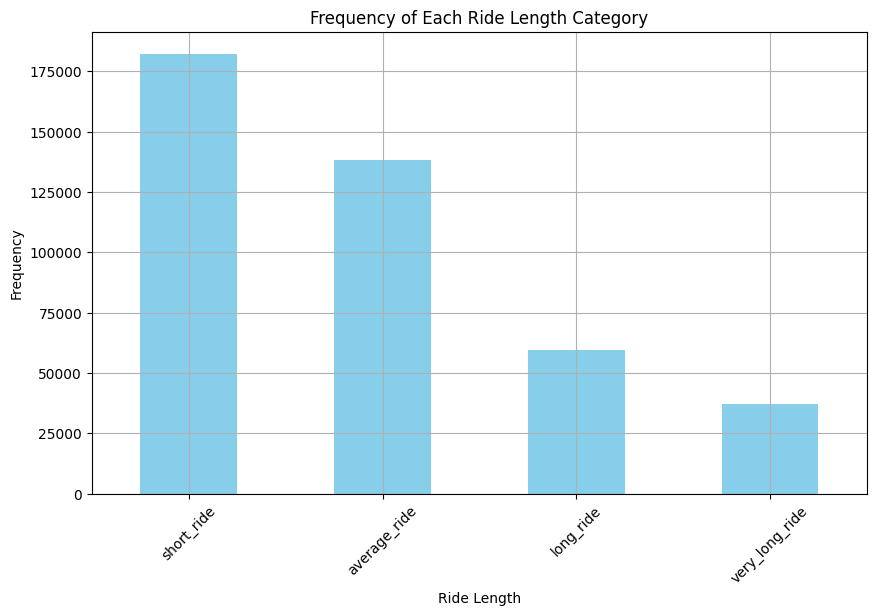

In [ ]:
# Calculating frequency of each ride length
ride_length_frequency = df['ride_length_category'].value_counts()

# Plotting the frequency chart
plt.figure(figsize=(10, 6))
ride_length_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Ride Length Category')
plt.xlabel('Ride Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- short_ride: 0 to 10 minutes
- average_ride: greater than 10 minutes up to 20 minutes
- long_ride: greater than 20 minutes up to 30 minutes
- very_long_ride: greater than 30 minutes

## **Comparative Analyses between Casual and Member**

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster,day_of_week,day_type
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"('Clark St & Lincoln Ave', 'Wilton Ave & Diver...",8,2021,Morning,Morning,1,Tuesday,Weekday
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"('Sheffield Ave & Willow St', 'Clark St & Rand...",6,2021,Morning,Morning,1,Tuesday,Weekday
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"('Seeley Ave & Roscoe St', 'Southport Ave & Cl...",6,2021,Afternoon,Afternoon,1,Sunday,Weekend
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"('Dearborn St & Monroe St', 'Wabash Ave & Roos...",7,2021,Afternoon,Afternoon,3,Sunday,Weekend
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"('Michigan Ave & Madison St', 'Streeter Dr & G...",9,2021,Afternoon,Afternoon,3,Saturday,Weekend


**Top Rideable Type for Members vs Casuals**

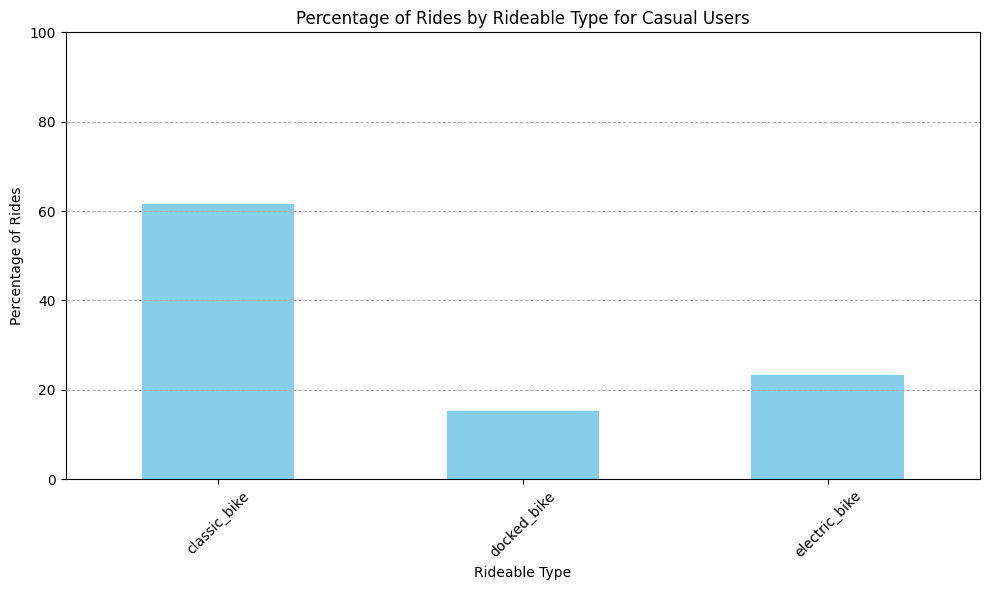

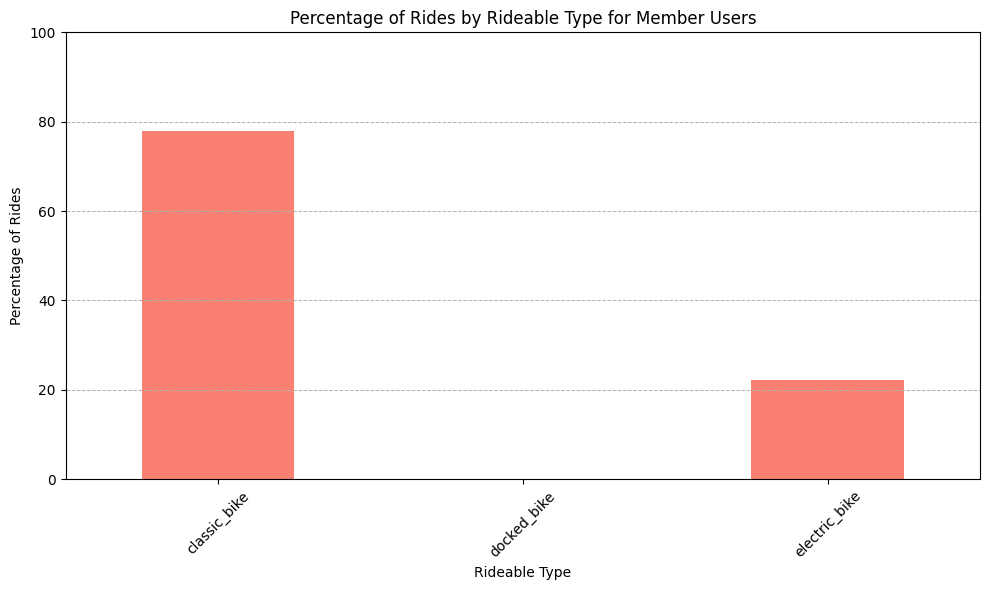

In [ ]:
# Define colors for each user type for consistency
colors = {'casual': 'skyblue', 'member': 'salmon'}

# Group by 'member_casual' and 'rideable_type' and count occurrences
ride_type_freq = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)

# Calculate percentages
ride_type_percentage = ride_type_freq.div(ride_type_freq.sum(axis=1), axis=0) * 100

# Plotting each user type on a separate chart
for user_type, data in ride_type_percentage.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', ax=ax, color=colors[user_type])
    ax.set_title(f'Percentage of Rides by Rideable Type for {user_type.capitalize()} Users')
    ax.set_xlabel('Rideable Type')
    ax.set_ylabel('Percentage of Rides')
    ax.set_ylim(0, 100)  # Set y-axis limits to show percentages clearly
    plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

**Average Ride Duration for Casuals and Members**

In [ ]:
# Calculate the average duration for both casual and member users
average_duration = df.groupby('member_casual')['duration_in_minutes'].mean()

average_duration



member_casual
casual    32.226134
member    13.206301
Name: duration_in_minutes, dtype: float64

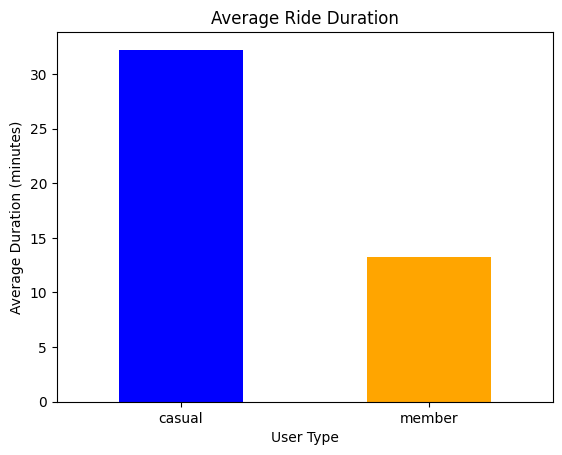

In [ ]:
# Sample average_duration data (replace with actual data if available)
average_duration = pd.Series({'casual': 32.226, 'member': 13.206})

# Create a bar chart for the average durations
average_duration.plot(kind='bar', color=['blue', 'orange'], title='Average Ride Duration')

# Add labels and title
plt.xlabel('User Type')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

**Times Ridden Throughout the Day by Casuals and Members**

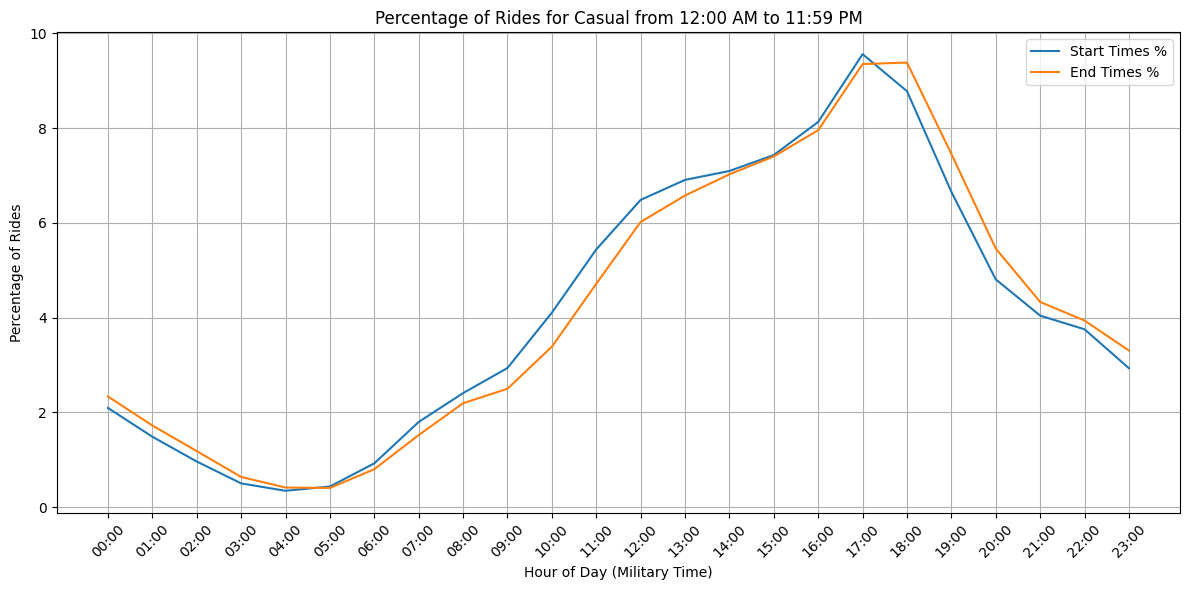

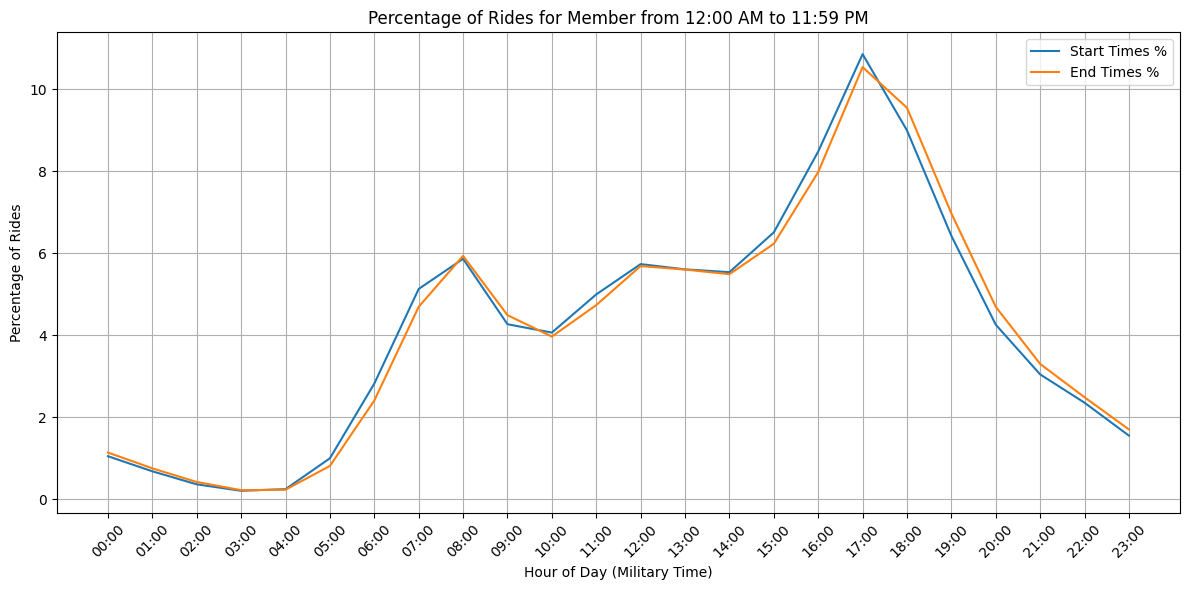

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the hour for both 'started_at' and 'ended_at'
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

# Define hours range for reindexing
hours_range = pd.RangeIndex(0, 24)

# Define categories to plot separately
categories = df['member_casual'].unique()

for category in categories:
    # Filter DataFrame for the current category
    df_filtered = df[df['member_casual'] == category]

    # Group by the extracted hours and count frequencies
    start_hours_freq = df_filtered['start_hour'].value_counts().sort_index()
    end_hours_freq = df_filtered['end_hour'].value_counts().sort_index()

    # Reindex the frequencies to the hours range, filling missing hours with 0
    start_hours_freq = start_hours_freq.reindex(hours_range, fill_value=0)
    end_hours_freq = end_hours_freq.reindex(hours_range, fill_value=0)

    # Convert frequencies to percentages
    start_hours_percent = start_hours_freq / start_hours_freq.sum() * 100
    end_hours_percent = end_hours_freq / end_hours_freq.sum() * 100

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot for 'started_at' times
    plt.plot(start_hours_percent.index, start_hours_percent.values, label='Start Times %')

    # Plot for 'ended_at' times
    plt.plot(end_hours_percent.index, end_hours_percent.values, label='End Times %')

    plt.title(f'Percentage of Rides for {category.capitalize()} from 12:00 AM to 11:59 PM')
    plt.xlabel('Hour of Day (Military Time)')
    plt.ylabel('Percentage of Rides')
    plt.xticks(hours_range, [f"{hour:02d}:00" for hour in hours_range], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

**Time of Day for Casuals and Members**

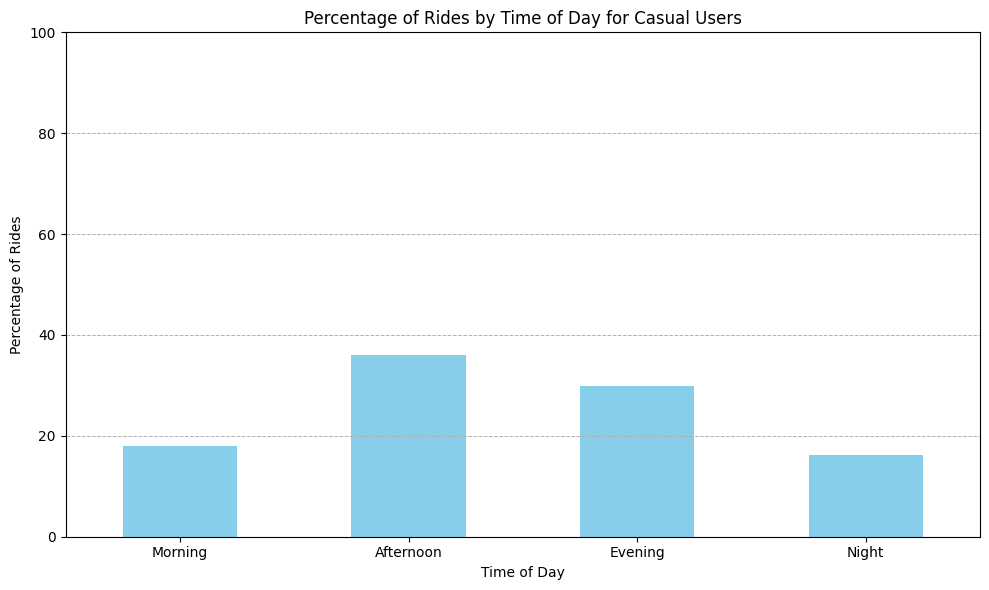

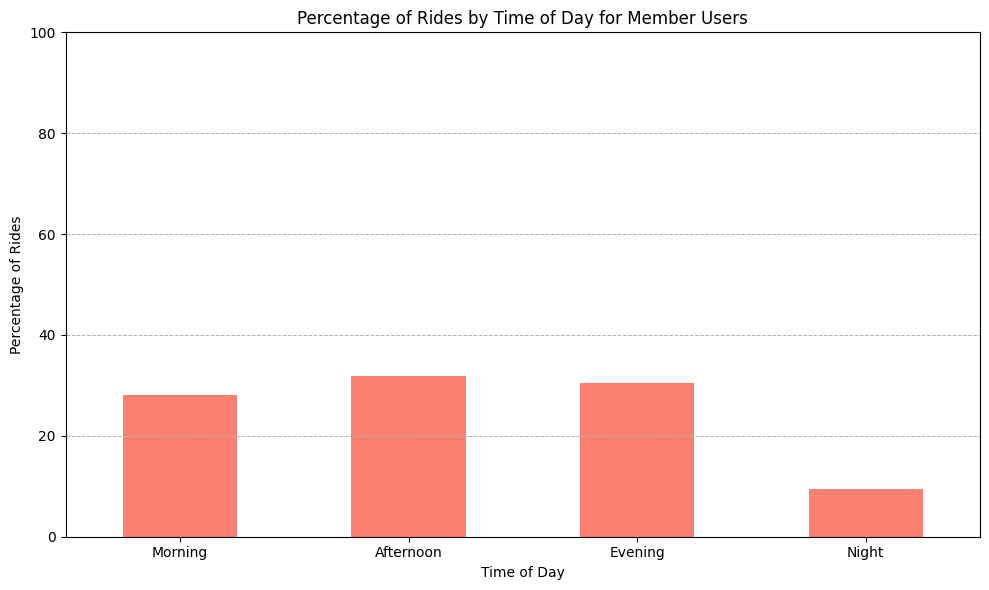

In [ ]:
# Define category order and palette
category_order = ['Morning', 'Afternoon', 'Evening', 'Night']
colors = {'casual': 'skyblue', 'member': 'salmon'}

# Group by 'member_casual' and 'time_of_day_started' and count occurrences
time_of_day_freq = df.groupby(['member_casual', 'time_of_day_started']).size().unstack(fill_value=0)
time_of_day_freq = time_of_day_freq[category_order]  # Reorder the columns

# Calculate percentages
time_of_day_percentage = time_of_day_freq.div(time_of_day_freq.sum(axis=1), axis=0) * 100

# Plotting each user type on a separate chart
for user_type, data in time_of_day_percentage.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', ax=ax, color=colors[user_type])
    ax.set_title(f'Percentage of Rides by Time of Day for {user_type.capitalize()} Users')
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Percentage of Rides')
    ax.set_ylim(0, 100)  # Set y-axis limits to show percentages clearly
    plt.xticks(rotation=0)  # Keep the labels horizontal for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

**Ride Length for Casual and Members**

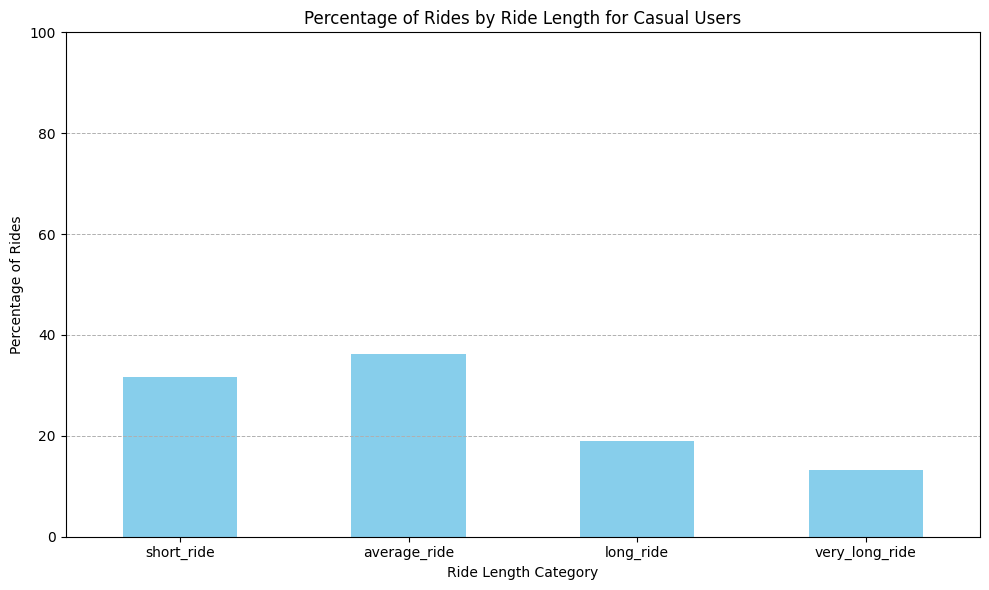

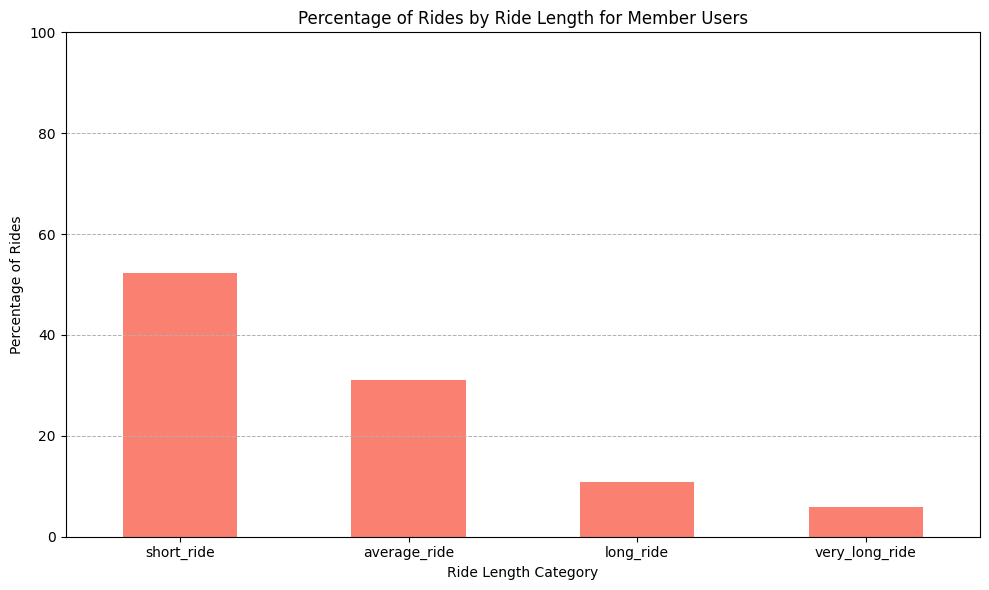

In [ ]:
# Define colors for each user type for consistency
colors = {'casual': 'skyblue', 'member': 'salmon'}

# Group by 'member_casual' and 'ride_length_category' and count occurrences
ride_length_freq = df.groupby(['member_casual', 'ride_length_category']).size().unstack(fill_value=0)

# Calculate percentages
ride_length_percentage = ride_length_freq.div(ride_length_freq.sum(axis=1), axis=0) * 100

# Plotting each user type on a separate chart
for user_type, data in ride_length_percentage.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', ax=ax, color=colors[user_type])
    ax.set_title(f'Percentage of Rides by Ride Length for {user_type.capitalize()} Users')
    ax.set_xlabel('Ride Length Category')
    ax.set_ylabel('Percentage of Rides')
    ax.set_ylim(0, 100)  # Set y-axis limits to show percentages clearly
    plt.xticks(rotation=0)  # Keep the labels horizontal for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

**Number of Rides for Each Month for Casuals and Members**

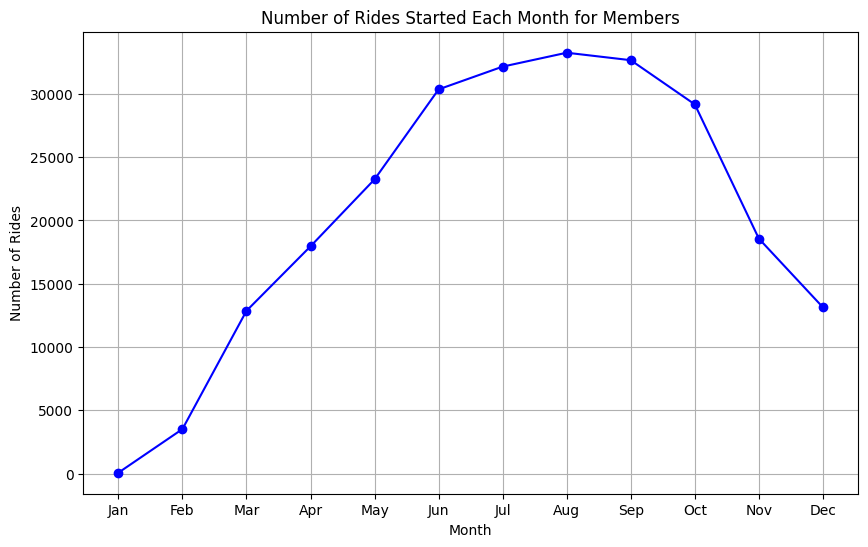

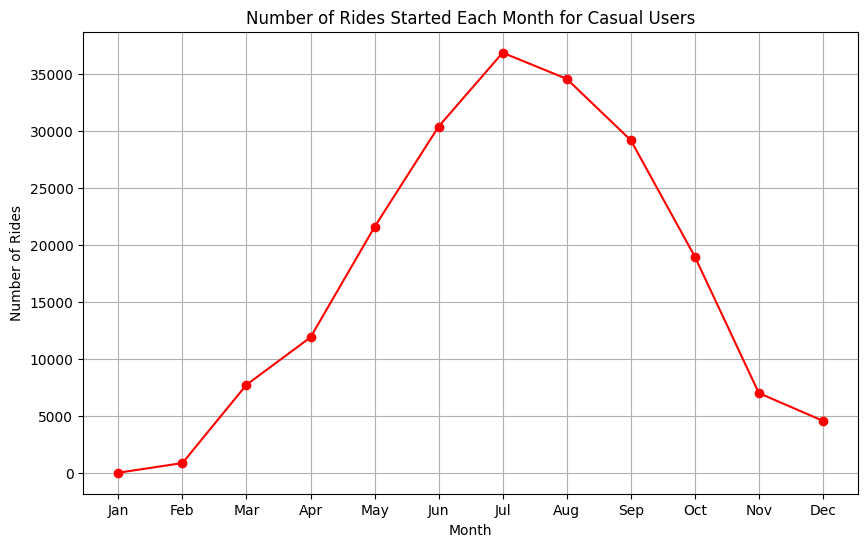

In [ ]:
# Filter the DataFrame for members
df_member = df[df['member_casual'] == 'member']
# Group by month and count the occurrences for members
monthly_counts_member = df_member.groupby('month').size()

# Filter the DataFrame for casual users
df_casual = df[df['member_casual'] == 'casual']
# Group by month and count the occurrences for casuals
monthly_counts_casual = df_casual.groupby('month').size()

# Plot the data for members
plt.figure(figsize=(10, 6))
monthly_counts_member.plot(kind='line', marker='o', color='blue')
plt.title('Number of Rides Started Each Month for Members')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plot the data for casual users
plt.figure(figsize=(10, 6))
monthly_counts_casual.plot(kind='line', marker='o', color='red')
plt.title('Number of Rides Started Each Month for Casual Users')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Logistic Regression Manipulation Preprocessing

In [98]:
import pandas as pd
# df = pd.read_excel('updated_df.xlsx')

In [135]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,cluster,day_of_week,day_type
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"('Clark St & Lincoln Ave', 'Wilton Ave & Diver...",8,2021,Morning,Morning,1,Tuesday,Weekday
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"('Sheffield Ave & Willow St', 'Clark St & Rand...",6,2021,Morning,Morning,1,Tuesday,Weekday
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"('Seeley Ave & Roscoe St', 'Southport Ave & Cl...",6,2021,Afternoon,Afternoon,1,Sunday,Weekend
3,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"('Dearborn St & Monroe St', 'Wabash Ave & Roos...",7,2021,Afternoon,Afternoon,3,Sunday,Weekend
4,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"('Michigan Ave & Madison St', 'Streeter Dr & G...",9,2021,Afternoon,Afternoon,3,Saturday,Weekend


**Turn Clusters into Labels**

- The **yellow cluster (4)** is located **North**
- The **purple cluster (0)** is located **West**
- The **blue cluster (1)** is **North Central**
- The **green cluster (3)**is **Central**
- The **teal cluster (2)** is **South**

**Feature Engineering**
- Goal is to choose columns that are not too specific to prevent overfitting.

In [100]:
reg_df = df.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [101]:
# Define the mapping from cluster number to direction
cluster_to_direction = {
    4: 'North',
    0: 'West',
    1: 'North Central',
    3: 'Central',
    2: 'South'
}

# Apply the mapping to the 'cluster' column
reg_df['region'] = reg_df['cluster'].map(cluster_to_direction)

# Now 'reg_df' will have a new column called 'cluster_label' with the directional labels.
reg_df.head()

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,cluster,day_of_week,region
0,classic_bike,casual,7.916667,8,Morning,1,Tuesday,North Central
1,classic_bike,casual,26.766667,6,Morning,1,Tuesday,North Central
2,electric_bike,member,11.433333,6,Afternoon,1,Sunday,North Central
3,classic_bike,casual,13.066667,7,Afternoon,3,Sunday,Central
4,classic_bike,casual,34.233333,9,Afternoon,3,Saturday,Central


In [102]:
reg_df.head()

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,cluster,day_of_week,region
0,classic_bike,casual,7.916667,8,Morning,1,Tuesday,North Central
1,classic_bike,casual,26.766667,6,Morning,1,Tuesday,North Central
2,electric_bike,member,11.433333,6,Afternoon,1,Sunday,North Central
3,classic_bike,casual,13.066667,7,Afternoon,3,Sunday,Central
4,classic_bike,casual,34.233333,9,Afternoon,3,Saturday,Central


In [103]:
# Convert month numbers to month names as strings in the 'month' column
reg_df['month'] = pd.to_datetime(reg_df['month'], format='%m').dt.strftime('%B')

In [104]:
reg_df.head()

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,cluster,day_of_week,region
0,classic_bike,casual,7.916667,August,Morning,1,Tuesday,North Central
1,classic_bike,casual,26.766667,June,Morning,1,Tuesday,North Central
2,electric_bike,member,11.433333,June,Afternoon,1,Sunday,North Central
3,classic_bike,casual,13.066667,July,Afternoon,3,Sunday,Central
4,classic_bike,casual,34.233333,September,Afternoon,3,Saturday,Central


Turn Duration in Minutes into Categories

- short_ride: 0 to 10 minutes
- average_ride: greater than 10 minutes up to 20 minutes
- long_ride: greater than 20 minutes up to 30 minutes
- very_long_ride: greater than 30 minutes

In [105]:
reg_df.describe()

,duration_in_minutes,cluster
count,450560.000000,450560.000000
mean,21.801741,2.184715
std,185.323524,1.204603
min,-51.416667,0.000000
25%,6.966667,1.000000
50%,12.250000,3.000000
75%,22.266667,3.000000
max,41629.166667,4.000000


In [106]:
reg_df['duration_in_minutes'].describe()

count    450560.000000
mean         21.801741
std         185.323524
min         -51.416667
25%           6.966667
50%          12.250000
75%          22.266667
max       41629.166667
Name: duration_in_minutes, dtype: float64

In [107]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
reg_df['ride_length_category'] = pd.cut(reg_df['duration_in_minutes'], bins=bins, labels=labels)

reg_df

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,cluster,day_of_week,region,ride_length_category
0,classic_bike,casual,7.916667,August,Morning,1,Tuesday,North Central,short_ride
1,classic_bike,casual,26.766667,June,Morning,1,Tuesday,North Central,long_ride
2,electric_bike,member,11.433333,June,Afternoon,1,Sunday,North Central,average_ride
3,classic_bike,casual,13.066667,July,Afternoon,3,Sunday,Central,average_ride
4,classic_bike,casual,34.233333,September,Afternoon,3,Saturday,Central,very_long_ride
...,...,...,...,...,...,...,...,...,...
450555,classic_bike,casual,13.366667,September,Evening,3,Saturday,Central,average_ride
450556,classic_bike,member,8.233333,August,Night,3,Friday,Central,short_ride
450557,classic_bike,member,3.633333,February,Morning,3,Friday,Central,short_ride
450558,classic_bike,member,6.533333,October,Night,1,Sunday,North Central,short_ride


In [108]:
reg_df = reg_df.drop(columns = ['duration_in_minutes'])

In [109]:
reg_df.head()

,rideable_type,member_casual,month,time_of_day_started,cluster,day_of_week,region,ride_length_category
0,classic_bike,casual,August,Morning,1,Tuesday,North Central,short_ride
1,classic_bike,casual,June,Morning,1,Tuesday,North Central,long_ride
2,electric_bike,member,June,Afternoon,1,Sunday,North Central,average_ride
3,classic_bike,casual,July,Afternoon,3,Sunday,Central,average_ride
4,classic_bike,casual,September,Afternoon,3,Saturday,Central,very_long_ride


Convert "Month" Column into a "Seasons" Column

In [110]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
reg_df['Season'] = reg_df['month'].map(seasons_mapping)

In [111]:
reg_df.head()

,rideable_type,member_casual,month,time_of_day_started,cluster,day_of_week,region,ride_length_category,Season
0,classic_bike,casual,August,Morning,1,Tuesday,North Central,short_ride,Summer
1,classic_bike,casual,June,Morning,1,Tuesday,North Central,long_ride,Summer
2,electric_bike,member,June,Afternoon,1,Sunday,North Central,average_ride,Summer
3,classic_bike,casual,July,Afternoon,3,Sunday,Central,average_ride,Summer
4,classic_bike,casual,September,Afternoon,3,Saturday,Central,very_long_ride,Autumn


In [112]:
reg_df = reg_df.drop(columns = ['month'])

In [113]:
reg_df.head()

,rideable_type,member_casual,time_of_day_started,cluster,day_of_week,region,ride_length_category,Season
0,classic_bike,casual,Morning,1,Tuesday,North Central,short_ride,Summer
1,classic_bike,casual,Morning,1,Tuesday,North Central,long_ride,Summer
2,electric_bike,member,Afternoon,1,Sunday,North Central,average_ride,Summer
3,classic_bike,casual,Afternoon,3,Sunday,Central,average_ride,Summer
4,classic_bike,casual,Afternoon,3,Saturday,Central,very_long_ride,Autumn


**Data Preprocessing**

Explore Categorical Variables

In [114]:
reg_df['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [115]:
reg_df['Season'].unique()

array(['Summer', 'Autumn', 'Spring', 'Winter'], dtype=object)

In [116]:
reg_df['time_of_day_started'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [117]:
reg_df['ride_length_category'].unique()

['short_ride', 'long_ride', 'average_ride', 'very_long_ride', NaN]
Categories (4, object): ['short_ride' < 'average_ride' < 'long_ride' < 'very_long_ride']

In [118]:
reg_df['region'].unique()

array(['North Central', 'Central', 'South', 'West', 'North'], dtype=object)

In [119]:
reg_df['day_of_week'].unique()

array(['Tuesday', 'Sunday', 'Saturday', 'Wednesday', 'Monday', 'Friday',
       'Thursday'], dtype=object)

In [120]:
reg_df.head()

,rideable_type,member_casual,time_of_day_started,cluster,day_of_week,region,ride_length_category,Season
0,classic_bike,casual,Morning,1,Tuesday,North Central,short_ride,Summer
1,classic_bike,casual,Morning,1,Tuesday,North Central,long_ride,Summer
2,electric_bike,member,Afternoon,1,Sunday,North Central,average_ride,Summer
3,classic_bike,casual,Afternoon,3,Sunday,Central,average_ride,Summer
4,classic_bike,casual,Afternoon,3,Saturday,Central,very_long_ride,Autumn


In [121]:
reg_df = reg_df.dropna()

In [122]:
reg_df.isna().sum()

rideable_type           0
member_casual           0
time_of_day_started     0
cluster                 0
day_of_week             0
region                  0
ride_length_category    0
Season                  0
dtype: int64

Create Dummies for Categorical Variables

In [123]:
dummies = pd.get_dummies(reg_df[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'region', 'day_of_week']], drop_first = True).astype(int)

In [124]:
dummies.columns

Index(['rideable_type_docked_bike', 'rideable_type_electric_bike',
       'time_of_day_started_Evening', 'time_of_day_started_Morning',
       'time_of_day_started_Night', 'ride_length_category_average_ride',
       'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'region_North',
       'region_North Central', 'region_South', 'region_West',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [125]:
# Drop the original categorical columns from reg_df
reg_df_dropped = reg_df.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week', 'region', 'cluster'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
reg_df = pd.concat([reg_df_dropped, dummies], axis=1)

reg_df # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,...,region_North,region_North Central,region_South,region_West,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,casual,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,casual,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,member,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,casual,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,casual,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450555,casual,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
450556,member,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450557,member,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450558,member,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Change 'member_casual' to 'Member'. Convert casual to 0 and member to 1.

In [126]:
reg_df.rename(columns={'member_casual': 'Member'}, inplace=True)

In [127]:
reg_df['Member'].unique()

array(['casual', 'member'], dtype=object)

In [128]:
# Convert 'member_casual' to integers (0s and 1s)
reg_df['Member'] = reg_df['Member'].replace({'casual': 0, 'member': 1})

In [129]:
reg_df['Member'].astype(int)

0         0
1         0
2         1
3         0
4         0
         ..
450555    0
450556    1
450557    1
450558    1
450559    1
Name: Member, Length: 417471, dtype: int64

**Undersample 'Member' because there are more members than casuals**

In [130]:
from sklearn.utils import resample
# Separate the majority and minority classes
reg_df_majority = reg_df[reg_df['Member'] == 1]
reg_df_minority = reg_df[reg_df['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(reg_df_majority.index,
                                replace=False,
                                n_samples=len(reg_df_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
reg_df_majority_undersampled = reg_df.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
reg_df = pd.concat([reg_df_majority_undersampled, reg_df_minority])

In [131]:
reg_df

,Member,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,...,region_North,region_North Central,region_South,region_West,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
274099,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
183245,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
306463,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
269868,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
334866,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450547,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
450549,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
450550,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
450551,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [132]:
# Display new class counts
reg_df['Member'].value_counts()

Member
1    174267
0    174267
Name: count, dtype: int64

**Pickle Pre-Processed ML Data**

In [133]:
pickle_file_path_2 ='/content/sample_data/reg_df.pkl'
reg_df.to_pickle(pickle_file_path_2)
pickle_file_path_2

'/content/sample_data/reg_df.pkl'

## **Model Training**

In [73]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.6 MB/s eta 0:00:00
Colab environment detected.


In [136]:
# Load pickle file
pickle_file_path = '/content/sample_data/reg_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df = pd.read_pickle(pickle_file_path)

In [145]:
y = reg_df['Member']

In [146]:
X = reg_df.drop(columns = ['Member'])

P-Value was too high for docked bikes and skews the model

In [150]:
X = X.drop(columns = ['rideable_type_docked_bike'])

In [151]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

**Train Model**

In [152]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.5751566360877883
       rideable_type_electric_bike  time_of_day_started_Evening  \
coeff                    -0.342583                     0.001872   

       time_of_day_started_Morning  time_of_day_started_Night  \
coeff                     0.429738                    -0.4821   

       ride_length_category_average_ride  ride_length_category_long_ride  \
coeff                          -0.619382                        -0.99712   

       ride_length_category_very_long_ride  Season_Spring  Season_Summer  \
coeff                            -1.255297       0.057909      -0.348334   

       Season_Winter  region_North  region_North Central  region_South  \
coeff       0.633856      0.294049              0.006837      0.134304   

       region_West  day_of_week_Monday  day_of_week_Saturday  \
coeff     0.069791             0.17886             -0.394481   

       day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
coeff           -0.334688              0.237478 

In [153]:
reg_df.columns

Index(['Member', 'rideable_type_docked_bike', 'rideable_type_electric_bike',
       'time_of_day_started_Evening', 'time_of_day_started_Morning',
       'time_of_day_started_Night', 'ride_length_category_average_ride',
       'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'region_North',
       'region_North Central', 'region_South', 'region_West',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [154]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
350184,1,0.432436,0.567564,1
89765,1,0.345269,0.654731,1
334092,1,0.638062,0.361938,0
349112,1,0.258458,0.741542,1
289233,1,0.604737,0.395263,0
...,...,...,...,...
333274,1,0.344129,0.655871,1
250690,0,0.469650,0.530350,1
412857,1,0.579113,0.420887,0
178548,0,0.664501,0.335499,0


In [155]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6387)

       Prediction
Actual     0     1
     0 67887 36621
     1 38938 65674
Confusion Matrix (Accuracy 0.6371)

       Prediction
Actual     0     1
     0 45137 24622
     1 25977 43678


<ipython-input-156-bfcbc3c99a92>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette="coolwarm")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

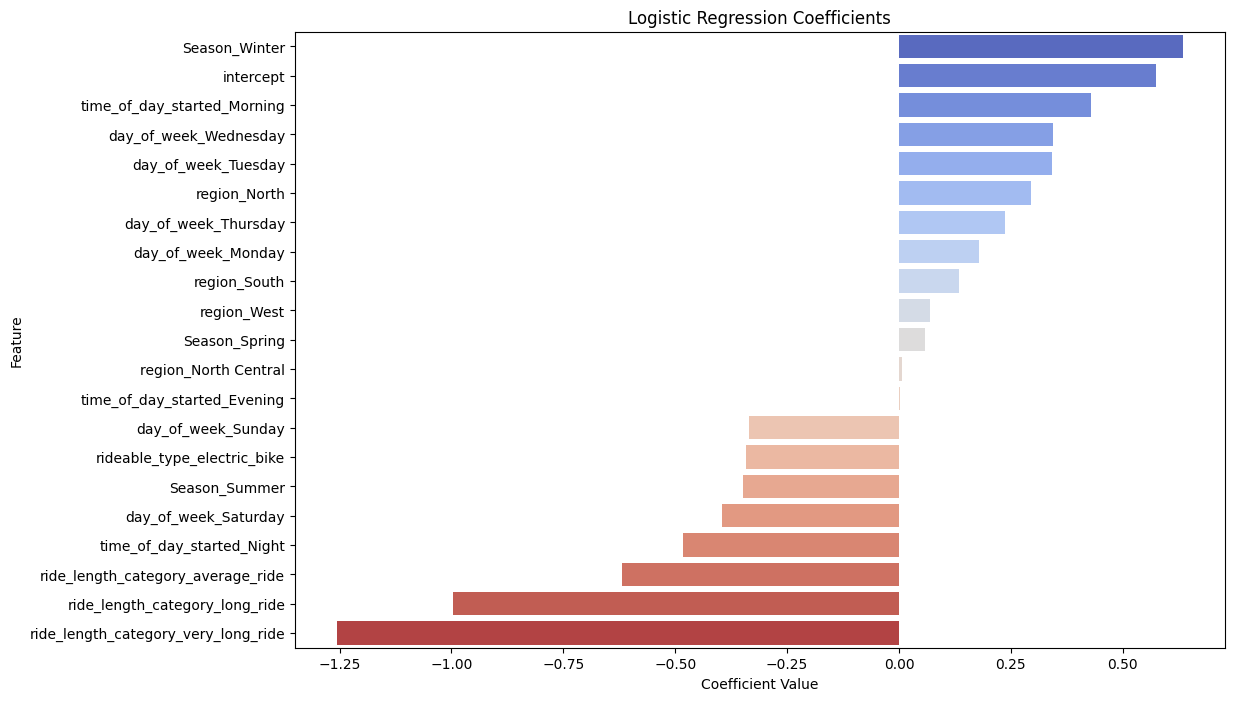

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficients and features from the provided image for the bar chart
coefficients = {
    'Feature': [
        'intercept', 'rideable_type_electric_bike', 'time_of_day_started_Evening',
        'time_of_day_started_Morning', 'time_of_day_started_Night',
        'ride_length_category_average_ride', 'ride_length_category_long_ride',
        'ride_length_category_very_long_ride', 'Season_Spring', 'Season_Summer',
        'Season_Winter', 'region_North', 'region_North Central', 'region_South',
        'region_West', 'day_of_week_Monday', 'day_of_week_Saturday',
        'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
        'day_of_week_Wednesday'
    ],
    'Coefficient': [
        0.5751566360877883, -0.342583, 0.001872, 0.429738, -0.4821,
        -0.619382, -0.99712, -1.255297, 0.057909, -0.348334,
        0.633856, 0.294049, 0.006837, 0.134304,
        0.069791, 0.17886, -0.394481,
        -0.334688, 0.237478, 0.34163,
        0.345056
    ]
}

# Create a DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the absolute values of the coefficients in descending order
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients in descending order
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette="coolwarm")

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
legend_patches = [plt.Rectangle((0,0),1,1, color=barplot.patches[i].get_facecolor()) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, labels=coeff_df['Feature'], title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


## ML Preprocessing for Each Cluster


### Cluster 0

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
# Assuming 'df' is your original DataFrame
df_0 = df[df['cluster'] == 0].copy()

# Optionally, if you want to drop the 'cluster' column from the new DataFrame:
df_0.drop('cluster', axis=1, inplace= True)

# Reset the index of the new DataFrame
df_0.reset_index(drop=True, inplace=True)

In [ ]:
df_0

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,day_of_week,day_type
0,electric_bike,2021-05-04 00:59:20,2021-05-04 01:11:12,Kedzie Ave & Milwaukee Ave,Milwaukee Ave & Wabansia Ave,41.929662,-87.708054,41.912655,-87.681410,member,11.866667,"('Kedzie Ave & Milwaukee Ave', 'Milwaukee Ave ...",5,2021,Night,Night,Tuesday,Weekday
1,classic_bike,2021-05-31 12:19:25,2021-05-31 12:44:41,Ashland Ave & Division St,Wells St & Concord Ln,41.903450,-87.667747,41.912133,-87.634656,member,25.266667,"('Ashland Ave & Division St', 'Wells St & Conc...",5,2021,Afternoon,Afternoon,Monday,Weekday
2,electric_bike,2021-05-30 15:12:17,2021-05-30 15:23:15,Western Ave & Fillmore St,Western Ave & Monroe St,41.868596,-87.686261,41.879804,-87.686065,casual,10.966667,"('Western Ave & Fillmore St', 'Western Ave & M...",5,2021,Afternoon,Afternoon,Sunday,Weekend
3,electric_bike,2021-06-14 17:20:38,2021-06-14 17:54:37,Ashland Ave & Grand Ave,Manor Ave & Leland Ave,41.891085,-87.666691,41.965860,-87.700836,casual,33.983333,"('Ashland Ave & Grand Ave', 'Manor Ave & Lelan...",6,2021,Evening,Evening,Monday,Weekday
4,classic_bike,2021-04-02 22:46:08,2021-04-02 23:04:09,Ashland Ave & Division St,Milwaukee Ave & Rockwell St,41.903450,-87.667747,41.920196,-87.692659,member,18.016667,"('Ashland Ave & Division St', 'Milwaukee Ave &...",4,2021,Night,Night,Friday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45878,electric_bike,2021-06-18 18:59:18,2021-06-18 19:06:17,Walsh Park,Leavitt St & North Ave,41.914631,-87.667950,41.910172,-87.682335,member,6.983333,"('Walsh Park', 'Leavitt St & North Ave')",6,2021,Evening,Evening,Friday,Weekday
45879,classic_bike,2021-06-09 13:19:34,2021-06-09 13:39:06,Paulina St & Flournoy St,Green St & Madison St,41.872950,-87.669130,41.881892,-87.648789,casual,19.533333,"('Paulina St & Flournoy St', 'Green St & Madis...",6,2021,Afternoon,Afternoon,Wednesday,Weekday
45880,classic_bike,2021-09-23 12:46:00,2021-09-23 12:53:18,Damen Ave & Division St,Claremont Ave & Hirsch St,41.903266,-87.678435,41.907781,-87.685854,member,7.300000,"('Damen Ave & Division St', 'Claremont Ave & H...",9,2021,Afternoon,Afternoon,Thursday,Weekday
45881,classic_bike,2021-09-01 17:41:30,2021-09-01 18:11:49,Spaulding Ave & Armitage Ave,Clark St & Armitage Ave,41.917108,-87.710221,41.918306,-87.636282,member,30.316667,"('Spaulding Ave & Armitage Ave', 'Clark St & A...",9,2021,Evening,Evening,Wednesday,Weekday


In [ ]:
df_0 = df_0.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [ ]:
df_0.columns

Index(['rideable_type', 'member_casual', 'duration_in_minutes', 'month',
       'time_of_day_started', 'day_of_week'],
      dtype='object')

In [ ]:
# Convert month numbers to month names as strings in the 'month' column
df_0['month'] = pd.to_datetime(df_0['month'], format='%m').dt.strftime('%B')

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df_0['ride_length_category'] = pd.cut(df_0['duration_in_minutes'], bins=bins, labels=labels)

df_0

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,day_of_week,ride_length_category
0,electric_bike,member,11.866667,May,Night,Tuesday,average_ride
1,classic_bike,member,25.266667,May,Afternoon,Monday,long_ride
2,electric_bike,casual,10.966667,May,Afternoon,Sunday,average_ride
3,electric_bike,casual,33.983333,June,Evening,Monday,very_long_ride
4,classic_bike,member,18.016667,April,Night,Friday,average_ride
...,...,...,...,...,...,...,...
45878,electric_bike,member,6.983333,June,Evening,Friday,short_ride
45879,classic_bike,casual,19.533333,June,Afternoon,Wednesday,average_ride
45880,classic_bike,member,7.300000,September,Afternoon,Thursday,short_ride
45881,classic_bike,member,30.316667,September,Evening,Wednesday,very_long_ride


In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
df_0['Season'] = df_0['month'].map(seasons_mapping)

In [ ]:
df_0 = df_0.drop(columns = ['month', 'duration_in_minutes'])

In [ ]:
df_0.head()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,electric_bike,member,Night,Tuesday,average_ride,Spring
1,classic_bike,member,Afternoon,Monday,long_ride,Spring
2,electric_bike,casual,Afternoon,Sunday,average_ride,Spring
3,electric_bike,casual,Evening,Monday,very_long_ride,Summer
4,classic_bike,member,Night,Friday,average_ride,Spring


In [ ]:
df_0.dropna()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,electric_bike,member,Night,Tuesday,average_ride,Spring
1,classic_bike,member,Afternoon,Monday,long_ride,Spring
2,electric_bike,casual,Afternoon,Sunday,average_ride,Spring
3,electric_bike,casual,Evening,Monday,very_long_ride,Summer
4,classic_bike,member,Night,Friday,average_ride,Spring
...,...,...,...,...,...,...
45878,electric_bike,member,Evening,Friday,short_ride,Summer
45879,classic_bike,casual,Afternoon,Wednesday,average_ride,Summer
45880,classic_bike,member,Afternoon,Thursday,short_ride,Autumn
45881,classic_bike,member,Evening,Wednesday,very_long_ride,Autumn


**Dummies**

In [ ]:
dummies_0 = pd.get_dummies(df_0[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week']], drop_first = True).astype(int)

In [ ]:
# Drop the original categorical columns from reg_df
dummies_0_dropped = df_0.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
df_0 = pd.concat([dummies_0_dropped, dummies_0], axis=1)

df_0.head() # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,member,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
1,member,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2,casual,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,casual,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,member,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0


**Change Dependent variablt to Int and Resample**

In [ ]:
df_0.rename(columns={'member_casual': 'Member'}, inplace=True)
# Convert 'member_casual' to integers (0s and 1s)
df_0['Member'] = df_0['Member'].replace({'casual': 0, 'member': 1})
df_0['Member'].astype(int)

0        1
1        1
2        0
3        0
4        1
        ..
45878    1
45879    0
45880    1
45881    1
45882    0
Name: Member, Length: 45883, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_0_majority = df_0[df_0['Member'] == 1]
df_0_minority = df_0[df_0['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(df_0_majority.index,
                                replace=False,
                                n_samples=len(df_0_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
df_0_majority_undersampled = df_0.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
df_0 = pd.concat([df_0_majority_undersampled, df_0_minority])

In [ ]:
# Display new class counts
df_0['Member'].value_counts()

Member
1    20277
0    20277
Name: count, dtype: int64

In [ ]:
pickle_file_path_cluster_0 ='/content/sample_data/df_0.pkl'
df_0.to_pickle(pickle_file_path_cluster_0)
pickle_file_path_cluster_0

'/content/sample_data/df_0.pkl'

### Cluster 1

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
# Assuming 'df' is your original DataFrame
df_1 = df[df['cluster'] == 1].copy()

# Optionally, if you want to drop the 'cluster' column from the new DataFrame:
df_1.drop('cluster', axis=1, inplace= True)

# Reset the index of the new DataFrame
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,day_of_week,day_type
0,classic_bike,2021-08-24 07:51:36,2021-08-24 07:59:31,Clark St & Lincoln Ave,Wilton Ave & Diversey Pkwy,41.915689,-87.634600,41.932418,-87.652705,casual,7.916667,"('Clark St & Lincoln Ave', 'Wilton Ave & Diver...",8,2021,Morning,Morning,Tuesday,Weekday
1,classic_bike,2021-06-15 07:16:35,2021-06-15 07:43:21,Sheffield Ave & Willow St,Clark St & Randolph St,41.913688,-87.652855,41.884576,-87.631890,casual,26.766667,"('Sheffield Ave & Willow St', 'Clark St & Rand...",6,2021,Morning,Morning,Tuesday,Weekday
2,electric_bike,2021-06-13 14:00:08,2021-06-13 14:11:34,Seeley Ave & Roscoe St,Southport Ave & Clybourn Ave,41.943400,-87.679673,41.920897,-87.663686,member,11.433333,"('Seeley Ave & Roscoe St', 'Southport Ave & Cl...",6,2021,Afternoon,Afternoon,Sunday,Weekend
3,classic_bike,2021-08-24 13:58:16,2021-08-24 14:06:27,Wilton Ave & Diversey Pkwy,Sedgwick St & Webster Ave,41.932418,-87.652705,41.922167,-87.638888,member,8.183333,"('Wilton Ave & Diversey Pkwy', 'Sedgwick St & ...",8,2021,Afternoon,Afternoon,Tuesday,Weekday
4,classic_bike,2021-07-25 01:14:32,2021-07-25 01:44:41,Wilton Ave & Belmont Ave,Desplaines St & Kinzie St,41.940180,-87.653040,41.888716,-87.644448,casual,30.150000,"('Wilton Ave & Belmont Ave', 'Desplaines St & ...",7,2021,Night,Night,Sunday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121116,classic_bike,2021-09-12 09:53:16,2021-09-12 12:59:47,Western Ave & Roscoe St,Broadway & Berwyn Ave,41.943034,-87.687288,41.978353,-87.659753,casual,186.516667,"('Western Ave & Roscoe St', 'Broadway & Berwyn...",9,2021,Morning,Afternoon,Sunday,Weekend
121117,electric_bike,2021-11-23 22:18:48,2021-11-23 22:32:11,Sheffield Ave & Willow St,Pine Grove Ave & Waveland Ave,41.913851,-87.652949,41.949441,-87.646519,casual,13.383333,"('Sheffield Ave & Willow St', 'Pine Grove Ave ...",11,2021,Night,Night,Tuesday,Weekday
121118,classic_bike,2021-07-31 11:36:33,2021-07-31 11:58:45,Sheffield Ave & Waveland Ave,Broadway & Barry Ave,41.949399,-87.654529,41.937582,-87.644098,member,22.200000,"('Sheffield Ave & Waveland Ave', 'Broadway & B...",7,2021,Morning,Morning,Saturday,Weekend
121119,classic_bike,2021-03-20 12:50:11,2021-03-20 13:07:42,Southport Ave & Clybourn Ave,Damen Ave & Charleston St,41.920771,-87.663712,41.920082,-87.677855,member,17.516667,"('Southport Ave & Clybourn Ave', 'Damen Ave & ...",3,2021,Afternoon,Afternoon,Saturday,Weekend


In [ ]:
df_1 = df_1.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [ ]:
df_1.columns

Index(['rideable_type', 'member_casual', 'duration_in_minutes', 'month',
       'time_of_day_started', 'day_of_week'],
      dtype='object')

In [ ]:
# Convert month numbers to month names as strings in the 'month' column
df_1['month'] = pd.to_datetime(df_1['month'], format='%m').dt.strftime('%B')

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df_1['ride_length_category'] = pd.cut(df_1['duration_in_minutes'], bins=bins, labels=labels)

df_1

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,day_of_week,ride_length_category
0,classic_bike,casual,7.916667,August,Morning,Tuesday,short_ride
1,classic_bike,casual,26.766667,June,Morning,Tuesday,long_ride
2,electric_bike,member,11.433333,June,Afternoon,Sunday,average_ride
3,classic_bike,member,8.183333,August,Afternoon,Tuesday,short_ride
4,classic_bike,casual,30.150000,July,Night,Sunday,very_long_ride
...,...,...,...,...,...,...,...
121116,classic_bike,casual,186.516667,September,Morning,Sunday,NaN
121117,electric_bike,casual,13.383333,November,Night,Tuesday,average_ride
121118,classic_bike,member,22.200000,July,Morning,Saturday,long_ride
121119,classic_bike,member,17.516667,March,Afternoon,Saturday,average_ride


In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
df_1['Season'] = df_1['month'].map(seasons_mapping)

In [ ]:
df_1 = df_1.drop(columns = ['month', 'duration_in_minutes'])

In [ ]:
df_1.head()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,casual,Morning,Tuesday,short_ride,Summer
1,classic_bike,casual,Morning,Tuesday,long_ride,Summer
2,electric_bike,member,Afternoon,Sunday,average_ride,Summer
3,classic_bike,member,Afternoon,Tuesday,short_ride,Summer
4,classic_bike,casual,Night,Sunday,very_long_ride,Summer


In [ ]:
df_1.dropna()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,casual,Morning,Tuesday,short_ride,Summer
1,classic_bike,casual,Morning,Tuesday,long_ride,Summer
2,electric_bike,member,Afternoon,Sunday,average_ride,Summer
3,classic_bike,member,Afternoon,Tuesday,short_ride,Summer
4,classic_bike,casual,Night,Sunday,very_long_ride,Summer
...,...,...,...,...,...,...
121114,classic_bike,member,Morning,Monday,short_ride,Summer
121117,electric_bike,casual,Night,Tuesday,average_ride,Autumn
121118,classic_bike,member,Morning,Saturday,long_ride,Summer
121119,classic_bike,member,Afternoon,Saturday,average_ride,Spring


**Dummies**

In [ ]:
dummies_1 = pd.get_dummies(df_1[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week']], drop_first = True).astype(int)

In [ ]:
# Drop the original categorical columns from reg_df
dummies_1_dropped = df_1.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
df_1 = pd.concat([dummies_1_dropped, dummies_1], axis=1)

df_1.head() # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,casual,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,casual,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,member,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,member,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,casual,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0


**Change Dependent variablt to Int and Resample**

In [ ]:
df_1.rename(columns={'member_casual': 'Member'}, inplace=True)
# Convert 'member_casual' to integers (0s and 1s)
df_1['Member'] = df_1['Member'].replace({'casual': 0, 'member': 1})
df_1['Member'].astype(int)

0         0
1         0
2         1
3         1
4         0
         ..
121116    0
121117    0
121118    1
121119    1
121120    1
Name: Member, Length: 121121, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_1_majority = df_1[df_1['Member'] == 1]
df_1_minority = df_1[df_1['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(df_1_majority.index,
                                replace=False,
                                n_samples=len(df_1_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
df_1_majority_undersampled = df_1.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
df_1 = pd.concat([df_1_majority_undersampled, df_1_minority])

In [ ]:
# Display new class counts
df_1['Member'].value_counts()

Member
1    54622
0    54622
Name: count, dtype: int64

In [ ]:
pickle_file_path_cluster_1 ='/content/sample_data/df_1.pkl'
df_1.to_pickle(pickle_file_path_cluster_1)
pickle_file_path_cluster_1

'/content/sample_data/df_1.pkl'

### Cluster 2

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
# Assuming 'df' is your original DataFrame
df_2 = df[df['cluster'] == 2].copy()

# Optionally, if you want to drop the 'cluster' column from the new DataFrame:
df_2.drop('cluster', axis=1, inplace= True)

# Reset the index of the new DataFrame
df_2.reset_index(drop=True, inplace=True)

In [ ]:
df_2

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,day_of_week,day_type
0,classic_bike,2021-09-29 20:37:52,2021-09-29 20:42:47,Ellis Ave & 55th St,Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,member,4.916667,"('Ellis Ave & 55th St', 'Ellis Ave & 60th St')",9,2021,Evening,Evening,Wednesday,Weekday
1,electric_bike,2021-10-04 17:15:16,2021-10-04 17:24:16,Lake Park Ave & 56th St,Greenwood Ave & 47th St,41.793331,-87.587859,41.809779,-87.599351,member,9.000000,"('Lake Park Ave & 56th St', 'Greenwood Ave & 4...",10,2021,Evening,Evening,Monday,Weekday
2,classic_bike,2021-08-19 17:52:53,2021-08-19 17:56:38,Ellis Ave & 55th St,Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,member,3.750000,"('Ellis Ave & 55th St', 'Ellis Ave & 60th St')",8,2021,Evening,Evening,Thursday,Weekday
3,classic_bike,2021-03-20 18:50:45,2021-03-20 19:04:38,Cornell Ave & Hyde Park Blvd,Dorchester Ave & 63rd St,41.802406,-87.586924,41.780406,-87.591416,member,13.883333,"('Cornell Ave & Hyde Park Blvd', 'Dorchester A...",3,2021,Evening,Evening,Saturday,Weekend
4,classic_bike,2021-10-31 10:02:05,2021-10-31 10:06:19,Ellis Ave & 55th St,Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,casual,4.233333,"('Ellis Ave & 55th St', 'Ellis Ave & 60th St')",10,2021,Morning,Morning,Sunday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21639,classic_bike,2021-07-07 08:33:27,2021-07-07 08:38:51,Union Ave & Root St,Halsted St & 37th St,41.819102,-87.643278,41.827059,-87.645720,casual,5.400000,"('Union Ave & Root St', 'Halsted St & 37th St')",7,2021,Morning,Morning,Wednesday,Weekday
21640,classic_bike,2021-09-03 22:39:52,2021-09-03 23:40:37,Fort Dearborn Dr & 31st St,Calumet Ave & 35th St,41.838556,-87.608218,41.831379,-87.618034,casual,60.750000,"('Fort Dearborn Dr & 31st St', 'Calumet Ave & ...",9,2021,Night,Night,Friday,Weekday
21641,classic_bike,2021-11-09 13:59:14,2021-11-09 14:01:08,Ellis Ave & 60th St,Ellis Ave & 58th St,41.785097,-87.601073,41.788746,-87.601334,member,1.900000,"('Ellis Ave & 60th St', 'Ellis Ave & 58th St')",11,2021,Afternoon,Afternoon,Tuesday,Weekday
21642,classic_bike,2021-10-08 18:06:00,2021-10-08 18:15:39,Ellis Ave & 55th St,Cornell Ave & Hyde Park Blvd,41.794301,-87.601450,41.802406,-87.586924,member,9.650000,"('Ellis Ave & 55th St', 'Cornell Ave & Hyde Pa...",10,2021,Evening,Evening,Friday,Weekday


In [ ]:
df_2 = df_2.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [ ]:
df_2.columns

Index(['rideable_type', 'member_casual', 'duration_in_minutes', 'month',
       'time_of_day_started', 'day_of_week'],
      dtype='object')

In [ ]:
# Convert month numbers to month names as strings in the 'month' column
df_2['month'] = pd.to_datetime(df_2['month'], format='%m').dt.strftime('%B')

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df_2['ride_length_category'] = pd.cut(df_2['duration_in_minutes'], bins=bins, labels=labels)

df_2

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,day_of_week,ride_length_category
0,classic_bike,member,4.916667,September,Evening,Wednesday,short_ride
1,electric_bike,member,9.000000,October,Evening,Monday,short_ride
2,classic_bike,member,3.750000,August,Evening,Thursday,short_ride
3,classic_bike,member,13.883333,March,Evening,Saturday,average_ride
4,classic_bike,casual,4.233333,October,Morning,Sunday,short_ride
...,...,...,...,...,...,...,...
21639,classic_bike,casual,5.400000,July,Morning,Wednesday,short_ride
21640,classic_bike,casual,60.750000,September,Night,Friday,NaN
21641,classic_bike,member,1.900000,November,Afternoon,Tuesday,short_ride
21642,classic_bike,member,9.650000,October,Evening,Friday,short_ride


In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
df_2['Season'] = df_2['month'].map(seasons_mapping)

In [ ]:
df_2 = df_2.drop(columns = ['month', 'duration_in_minutes'])

In [ ]:
df_2.head()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,member,Evening,Wednesday,short_ride,Autumn
1,electric_bike,member,Evening,Monday,short_ride,Autumn
2,classic_bike,member,Evening,Thursday,short_ride,Summer
3,classic_bike,member,Evening,Saturday,average_ride,Spring
4,classic_bike,casual,Morning,Sunday,short_ride,Autumn


In [ ]:
df_2.dropna()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,member,Evening,Wednesday,short_ride,Autumn
1,electric_bike,member,Evening,Monday,short_ride,Autumn
2,classic_bike,member,Evening,Thursday,short_ride,Summer
3,classic_bike,member,Evening,Saturday,average_ride,Spring
4,classic_bike,casual,Morning,Sunday,short_ride,Autumn
...,...,...,...,...,...,...
21637,classic_bike,member,Evening,Monday,short_ride,Autumn
21638,classic_bike,casual,Afternoon,Saturday,short_ride,Summer
21639,classic_bike,casual,Morning,Wednesday,short_ride,Summer
21641,classic_bike,member,Afternoon,Tuesday,short_ride,Autumn


**Dummies**

In [ ]:
dummies_2 = pd.get_dummies(df_2[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week']], drop_first = True).astype(int)

In [ ]:
# Drop the original categorical columns from reg_df
dummies_2_dropped = df_2.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
df_2 = pd.concat([dummies_2_dropped, dummies_2], axis=1)

df_2.head() # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,member,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,member,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,member,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,member,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,casual,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


**Change Dependent variablt to Int and Resample**

In [ ]:
df_2.rename(columns={'member_casual': 'Member'}, inplace=True)
# Convert 'member_casual' to integers (0s and 1s)
df_2['Member'] = df_2['Member'].replace({'casual': 0, 'member': 1})
df_2['Member'].astype(int)

0        1
1        1
2        1
3        1
4        0
        ..
21639    0
21640    0
21641    1
21642    1
21643    1
Name: Member, Length: 21644, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_2_majority = df_2[df_2['Member'] == 1]
df_2_minority = df_2[df_2['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(df_2_majority.index,
                                replace=False,
                                n_samples=len(df_2_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
df_2_majority_undersampled = df_2.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
df_2 = pd.concat([df_2_majority_undersampled, df_2_minority])

In [ ]:
# Display new class counts
df_2['Member'].value_counts()

Member
1    9233
0    9233
Name: count, dtype: int64

In [ ]:
pickle_file_path_cluster_2 ='/content/sample_data/df_2.pkl'
df_2.to_pickle(pickle_file_path_cluster_2)
pickle_file_path_cluster_2

'/content/sample_data/df_2.pkl'

### Cluster 3

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
# Assuming 'df' is your original DataFrame
df_3 = df[df['cluster'] == 3].copy()

# Optionally, if you want to drop the 'cluster' column from the new DataFrame:
df_3.drop('cluster', axis=1, inplace= True)

# Reset the index of the new DataFrame
df_3.reset_index(drop=True, inplace=True)

In [ ]:
df_3

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,day_of_week,day_type
0,classic_bike,2021-07-18 15:19:21,2021-07-18 15:32:25,Dearborn St & Monroe St,Wabash Ave & Roosevelt Rd,41.881320,-87.629521,41.867227,-87.625961,casual,13.066667,"('Dearborn St & Monroe St', 'Wabash Ave & Roos...",7,2021,Afternoon,Afternoon,Sunday,Weekend
1,classic_bike,2021-09-04 16:01:08,2021-09-04 16:35:22,Michigan Ave & Madison St,Streeter Dr & Grand Ave,41.882134,-87.625125,41.892278,-87.612043,casual,34.233333,"('Michigan Ave & Madison St', 'Streeter Dr & G...",9,2021,Afternoon,Afternoon,Saturday,Weekend
2,classic_bike,2021-03-30 14:02:40,2021-03-30 14:16:08,Clinton St & 18th St,Wentworth Ave & 24th St (Temp),41.857950,-87.640826,41.850084,-87.632141,member,13.466667,"('Clinton St & 18th St', 'Wentworth Ave & 24th...",3,2021,Afternoon,Afternoon,Tuesday,Weekday
3,docked_bike,2021-08-04 12:57:46,2021-08-04 13:37:33,Blue Island Ave & 18th St,Blue Island Ave & 18th St,41.857556,-87.661535,41.857556,-87.661535,casual,39.783333,"('Blue Island Ave & 18th St', 'Blue Island Ave...",8,2021,Afternoon,Afternoon,Wednesday,Weekday
4,classic_bike,2021-03-06 16:50:56,2021-03-06 17:11:51,Dusable Harbor,Burnham Harbor,41.886976,-87.612813,41.856268,-87.613348,casual,20.916667,"('Dusable Harbor', 'Burnham Harbor')",3,2021,Afternoon,Evening,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227707,classic_bike,2021-07-23 11:25:24,2021-07-23 11:30:30,May St & Taylor St,Morgan St & Polk St,41.869482,-87.655486,41.871737,-87.651030,member,5.100000,"('May St & Taylor St', 'Morgan St & Polk St')",7,2021,Morning,Morning,Friday,Weekday
227708,classic_bike,2021-09-04 19:12:38,2021-09-04 19:26:00,State St & Randolph St,Milwaukee Ave & Grand Ave,41.884679,-87.627975,41.891578,-87.648384,casual,13.366667,"('State St & Randolph St', 'Milwaukee Ave & Gr...",9,2021,Evening,Evening,Saturday,Weekend
227709,classic_bike,2021-08-20 23:18:51,2021-08-20 23:27:05,Racine Ave & Randolph St,Ashland Ave & Grand Ave,41.884069,-87.656853,41.891072,-87.666611,member,8.233333,"('Racine Ave & Randolph St', 'Ashland Ave & Gr...",8,2021,Night,Night,Friday,Weekday
227710,classic_bike,2021-02-26 07:51:29,2021-02-26 07:55:07,Clybourn Ave & Division St,Orleans St & Chestnut St (NEXT Apts),41.904613,-87.640552,41.898203,-87.637536,member,3.633333,"('Clybourn Ave & Division St', 'Orleans St & C...",2,2021,Morning,Morning,Friday,Weekday


In [ ]:
df_3 = df_3.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [ ]:
df_3.columns

Index(['rideable_type', 'member_casual', 'duration_in_minutes', 'month',
       'time_of_day_started', 'day_of_week'],
      dtype='object')

In [ ]:
# Convert month numbers to month names as strings in the 'month' column
df_3['month'] = pd.to_datetime(df_3['month'], format='%m').dt.strftime('%B')

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df_3['ride_length_category'] = pd.cut(df_3['duration_in_minutes'], bins=bins, labels=labels)

df_3

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,day_of_week,ride_length_category
0,classic_bike,casual,13.066667,July,Afternoon,Sunday,average_ride
1,classic_bike,casual,34.233333,September,Afternoon,Saturday,very_long_ride
2,classic_bike,member,13.466667,March,Afternoon,Tuesday,average_ride
3,docked_bike,casual,39.783333,August,Afternoon,Wednesday,very_long_ride
4,classic_bike,casual,20.916667,March,Afternoon,Saturday,long_ride
...,...,...,...,...,...,...,...
227707,classic_bike,member,5.100000,July,Morning,Friday,short_ride
227708,classic_bike,casual,13.366667,September,Evening,Saturday,average_ride
227709,classic_bike,member,8.233333,August,Night,Friday,short_ride
227710,classic_bike,member,3.633333,February,Morning,Friday,short_ride


In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
df_3['Season'] = df_3['month'].map(seasons_mapping)

In [ ]:
df_3 = df_3.drop(columns = ['month', 'duration_in_minutes'])

In [ ]:
df_3.head()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,casual,Afternoon,Sunday,average_ride,Summer
1,classic_bike,casual,Afternoon,Saturday,very_long_ride,Autumn
2,classic_bike,member,Afternoon,Tuesday,average_ride,Spring
3,docked_bike,casual,Afternoon,Wednesday,very_long_ride,Summer
4,classic_bike,casual,Afternoon,Saturday,long_ride,Spring


In [ ]:
df_3.dropna()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,casual,Afternoon,Sunday,average_ride,Summer
1,classic_bike,casual,Afternoon,Saturday,very_long_ride,Autumn
2,classic_bike,member,Afternoon,Tuesday,average_ride,Spring
3,docked_bike,casual,Afternoon,Wednesday,very_long_ride,Summer
4,classic_bike,casual,Afternoon,Saturday,long_ride,Spring
...,...,...,...,...,...,...
227707,classic_bike,member,Morning,Friday,short_ride,Summer
227708,classic_bike,casual,Evening,Saturday,average_ride,Autumn
227709,classic_bike,member,Night,Friday,short_ride,Summer
227710,classic_bike,member,Morning,Friday,short_ride,Winter


**Dummies**

In [ ]:
dummies_3 = pd.get_dummies(df_3[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week']], drop_first = True).astype(int)

In [ ]:
# Drop the original categorical columns from reg_df
dummies_3_dropped = df_3.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
df_3 = pd.concat([dummies_3_dropped, dummies_3], axis=1)

df_3.head() # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,casual,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,casual,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,member,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,casual,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,casual,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


**Change Dependent variablt to Int and Resample**

In [ ]:
df_3.rename(columns={'member_casual': 'Member'}, inplace=True)
# Convert 'member_casual' to integers (0s and 1s)
df_3['Member'] = df_3['Member'].replace({'casual': 0, 'member': 1})
df_3['Member'].astype(int)

0         0
1         0
2         1
3         0
4         0
         ..
227707    1
227708    0
227709    1
227710    1
227711    1
Name: Member, Length: 227712, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_3_majority = df_3[df_3['Member'] == 1]
df_3_minority = df_3[df_3['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(df_3_majority.index,
                                replace=False,
                                n_samples=len(df_3_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
df_3_majority_undersampled = df_3.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
df_3 = pd.concat([df_3_majority_undersampled, df_3_minority])

In [ ]:
# Display new class counts
df_3['Member'].value_counts()

Member
1    105690
0    105690
Name: count, dtype: int64

In [ ]:
pickle_file_path_cluster_3 ='/content/sample_data/df_3.pkl'
df_3.to_pickle(pickle_file_path_cluster_3)
pickle_file_path_cluster_3

'/content/sample_data/df_3.pkl'

### Cluster 4

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/updated_df.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
df = pd.read_pickle(pickle_file_path)

In [ ]:
# Assuming 'df' is your original DataFrame
df_4 = df[df['cluster'] == 4].copy()

# Optionally, if you want to drop the 'cluster' column from the new DataFrame:
df_4.drop('cluster', axis=1, inplace= True)

# Reset the index of the new DataFrame
df_4.reset_index(drop=True, inplace=True)

In [ ]:
df_4

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_minutes,path,month,year,time_of_day_started,time_of_day_ended,day_of_week,day_type
0,classic_bike,2021-08-27 23:08:51,2021-08-27 23:21:30,Clark St & Leland Ave,Clark St & Elmdale Ave,41.967096,-87.667429,41.990860,-87.669724,member,12.650000,"('Clark St & Leland Ave', 'Clark St & Elmdale ...",8,2021,Night,Night,Friday,Weekday
1,classic_bike,2021-09-18 17:17:37,2021-09-18 17:20:49,Drake Ave & Addison St,Bernard St & Elston Ave,41.947326,-87.717582,41.949923,-87.713949,member,3.200000,"('Drake Ave & Addison St', 'Bernard St & Elsto...",9,2021,Evening,Evening,Saturday,Weekend
2,classic_bike,2021-05-26 22:04:03,2021-05-26 22:07:50,Sheridan Rd & Noyes St (NU),Chicago Ave & Sheridan Rd,42.058239,-87.677432,42.050491,-87.677821,member,3.783333,"('Sheridan Rd & Noyes St (NU)', 'Chicago Ave &...",5,2021,Night,Night,Wednesday,Weekday
3,classic_bike,2021-08-27 18:26:17,2021-08-27 18:33:21,Ravenswood Ave & Lawrence Ave,Broadway & Wilson - Truman College Vaccination...,41.969090,-87.674237,41.965221,-87.658139,member,7.066667,"('Ravenswood Ave & Lawrence Ave', 'Broadway & ...",8,2021,Evening,Evening,Friday,Weekday
4,classic_bike,2021-07-03 00:25:57,2021-07-03 00:29:27,Clark St & Montrose Ave,Wolcott (Ravenswood) Ave & Montrose Ave,41.961588,-87.666036,41.961406,-87.676169,member,3.500000,"('Clark St & Montrose Ave', 'Wolcott (Ravenswo...",7,2021,Night,Night,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,classic_bike,2021-10-20 16:00:08,2021-10-20 16:20:22,Broadway & Argyle St,Broadway & Argyle St,41.973815,-87.659660,41.973815,-87.659660,member,20.233333,"('Broadway & Argyle St', 'Broadway & Argyle St')",10,2021,Afternoon,Afternoon,Wednesday,Weekday
34196,electric_bike,2021-07-22 08:43:11,2021-07-22 08:49:25,Ravenswood Ave & Lawrence Ave,Sheridan Rd & Montrose Ave,41.969126,-87.674222,41.961619,-87.654730,member,6.233333,"('Ravenswood Ave & Lawrence Ave', 'Sheridan Rd...",7,2021,Morning,Morning,Thursday,Weekday
34197,classic_bike,2021-04-02 09:21:55,2021-04-02 09:34:03,Broadway & Ridge Ave,Clark St & Leland Ave,41.984045,-87.660274,41.967096,-87.667429,member,12.133333,"('Broadway & Ridge Ave', 'Clark St & Leland Ave')",4,2021,Morning,Morning,Friday,Weekday
34198,electric_bike,2021-07-12 16:32:38,2021-07-12 16:39:57,Clark St & Montrose Ave,Clarendon Ave & Leland Ave,41.961550,-87.666286,41.967982,-87.649963,casual,7.316667,"('Clark St & Montrose Ave', 'Clarendon Ave & L...",7,2021,Afternoon,Afternoon,Monday,Weekday


In [ ]:
df_4 = df_4.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'path',
                   'time_of_day_ended', 'year', 'day_type'])

In [ ]:
df_4.columns

Index(['rideable_type', 'member_casual', 'duration_in_minutes', 'month',
       'time_of_day_started', 'day_of_week'],
      dtype='object')

In [ ]:
# Convert month numbers to month names as strings in the 'month' column
df_4['month'] = pd.to_datetime(df_4['month'], format='%m').dt.strftime('%B')

In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
df_4['ride_length_category'] = pd.cut(df_4['duration_in_minutes'], bins=bins, labels=labels)

df_4

,rideable_type,member_casual,duration_in_minutes,month,time_of_day_started,day_of_week,ride_length_category
0,classic_bike,member,12.650000,August,Night,Friday,average_ride
1,classic_bike,member,3.200000,September,Evening,Saturday,short_ride
2,classic_bike,member,3.783333,May,Night,Wednesday,short_ride
3,classic_bike,member,7.066667,August,Evening,Friday,short_ride
4,classic_bike,member,3.500000,July,Night,Saturday,short_ride
...,...,...,...,...,...,...,...
34195,classic_bike,member,20.233333,October,Afternoon,Wednesday,long_ride
34196,electric_bike,member,6.233333,July,Morning,Thursday,short_ride
34197,classic_bike,member,12.133333,April,Morning,Friday,average_ride
34198,electric_bike,casual,7.316667,July,Afternoon,Monday,short_ride


In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
df_4['Season'] = df_4['month'].map(seasons_mapping)

In [ ]:
df_4 = df_4.drop(columns = ['month', 'duration_in_minutes'])

In [ ]:
df_4.head()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,member,Night,Friday,average_ride,Summer
1,classic_bike,member,Evening,Saturday,short_ride,Autumn
2,classic_bike,member,Night,Wednesday,short_ride,Spring
3,classic_bike,member,Evening,Friday,short_ride,Summer
4,classic_bike,member,Night,Saturday,short_ride,Summer


In [ ]:
df_4.dropna()

,rideable_type,member_casual,time_of_day_started,day_of_week,ride_length_category,Season
0,classic_bike,member,Night,Friday,average_ride,Summer
1,classic_bike,member,Evening,Saturday,short_ride,Autumn
2,classic_bike,member,Night,Wednesday,short_ride,Spring
3,classic_bike,member,Evening,Friday,short_ride,Summer
4,classic_bike,member,Night,Saturday,short_ride,Summer
...,...,...,...,...,...,...
34195,classic_bike,member,Afternoon,Wednesday,long_ride,Autumn
34196,electric_bike,member,Morning,Thursday,short_ride,Summer
34197,classic_bike,member,Morning,Friday,average_ride,Spring
34198,electric_bike,casual,Afternoon,Monday,short_ride,Summer


**Dummies**

In [ ]:
dummies_4 = pd.get_dummies(df_4[['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week']], drop_first = True).astype(int)

In [ ]:
# Drop the original categorical columns from reg_df
dummies_4_dropped = df_4.drop(['rideable_type', 'time_of_day_started', 'ride_length_category', 'Season', 'day_of_week'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
df_4 = pd.concat([dummies_4_dropped, dummies_4], axis=1)

df_4.head() # Display the first few rows to verify

,member_casual,rideable_type_docked_bike,rideable_type_electric_bike,time_of_day_started_Evening,time_of_day_started_Morning,time_of_day_started_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,member,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
1,member,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,member,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,member,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,member,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


**Change Dependent variablt to Int and Resample**

In [ ]:
df_4.rename(columns={'member_casual': 'Member'}, inplace=True)
# Convert 'member_casual' to integers (0s and 1s)
df_4['Member'] = df_4['Member'].replace({'casual': 0, 'member': 1})
df_4['Member'].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
34195    1
34196    1
34197    1
34198    0
34199    1
Name: Member, Length: 34200, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_4_majority = df_4[df_4['Member'] == 1]
df_4_minority = df_4[df_4['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(df_4_majority.index,
                                replace=False,
                                n_samples=len(df_4_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
df_4_majority_undersampled = df_4.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
df_4 = pd.concat([df_4_majority_undersampled, df_4_minority])

In [ ]:
# Display new class counts
df_4['Member'].value_counts()

Member
1    13795
0    13795
Name: count, dtype: int64

In [ ]:
pickle_file_path_cluster_4 ='/content/sample_data/df_4.pkl'
df_4.to_pickle(pickle_file_path_cluster_4)
pickle_file_path_cluster_4

'/content/sample_data/df_4.pkl'

## **ML Model Training for Each Cluster**

### ML for Cluster 0

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/df_0.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df_0 = pd.read_pickle(pickle_file_path)

In [ ]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

In [ ]:
y = reg_df_0['Member']

In [ ]:
X = reg_df_0.drop(columns = ['Member'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.4655881815145885
       rideable_type_docked_bike  rideable_type_electric_bike  \
coeff                  -11.25586                    -0.344759   

       time_of_day_started_Evening  time_of_day_started_Morning  \
coeff                    -0.110029                     0.395413   

       time_of_day_started_Night  ride_length_category_average_ride  \
coeff                  -0.655896                          -0.163812   

       ride_length_category_long_ride  ride_length_category_very_long_ride  \
coeff                       -0.468604                            -0.554528   

       Season_Spring  Season_Summer  Season_Winter  day_of_week_Monday  \
coeff        0.16693      -0.294927       0.579111             0.24608   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
coeff             -0.372322           -0.332397              0.243333   

       day_of_week_Tuesday  day_of_week_Wednesday  
coeff             0.412679               0.306937  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
19311,1,0.318142,0.681858,1
32402,1,0.268131,0.731869,1
32162,1,0.218628,0.781372,1
19404,0,0.297130,0.702870,1
23195,0,0.237228,0.762772,1
...,...,...,...,...
10602,1,0.306839,0.693161,1
3252,0,0.674024,0.325976,0
7464,1,0.270891,0.729109,1
34802,0,0.541067,0.458933,0


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6395)

       Prediction
Actual    0    1
     0 6917 5243
     1 3528 8644
Confusion Matrix (Accuracy 0.6351)

       Prediction
Actual    0    1
     0 4604 3513
     1 2406 5699


### ML for Cluster 1

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/df_1.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df_1 = pd.read_pickle(pickle_file_path)

In [ ]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

In [ ]:
y = reg_df_1['Member']

In [ ]:
X = reg_df_1.drop(columns = ['Member'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.539105366069755
       rideable_type_docked_bike  rideable_type_electric_bike  \
coeff                 -11.239638                    -0.470552   

       time_of_day_started_Evening  time_of_day_started_Morning  \
coeff                    -0.083546                     0.463309   

       time_of_day_started_Night  ride_length_category_average_ride  \
coeff                  -0.387581                          -0.350905   

       ride_length_category_long_ride  ride_length_category_very_long_ride  \
coeff                       -0.438765                            -0.656804   

       Season_Spring  Season_Summer  Season_Winter  day_of_week_Monday  \
coeff       0.109392      -0.320468       0.814917            0.149687   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
coeff             -0.362976           -0.353715              0.189465   

       day_of_week_Tuesday  day_of_week_Wednesday  
coeff              0.26082               0.290898  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
112795,0,0.438851,0.561149,1
32741,0,0.621341,0.378659,0
3056,0,0.591769,0.408231,0
86515,1,0.216400,0.783600,1
92171,1,0.525493,0.474507,0
...,...,...,...,...
49784,1,0.589530,0.410470,0
29331,1,0.408946,0.591054,1
117660,0,0.321594,0.678406,1
75949,1,0.529913,0.470087,0


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6303)

       Prediction
Actual     0     1
     0 19674 13176
     1 11055 21641
Confusion Matrix (Accuracy 0.6336)

       Prediction
Actual     0     1
     0 13035  8737
     1  7274 14652


### ML for Cluster 2

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/df_2.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df_2 = pd.read_pickle(pickle_file_path)

In [ ]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

In [ ]:
y = reg_df_2['Member']

In [ ]:
X = reg_df_2.drop(columns = ['Member'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.841840032774146
       rideable_type_docked_bike  rideable_type_electric_bike  \
coeff                 -11.312881                    -0.403988   

       time_of_day_started_Evening  time_of_day_started_Morning  \
coeff                     0.075923                     0.178145   

       time_of_day_started_Night  ride_length_category_average_ride  \
coeff                  -0.470946                           -0.39783   

       ride_length_category_long_ride  ride_length_category_very_long_ride  \
coeff                       -0.502015                            -0.510734   

       Season_Spring  Season_Summer  Season_Winter  day_of_week_Monday  \
coeff      -0.450186      -0.677305       0.224168           -0.015533   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
coeff              -0.39448           -0.266198              0.133068   

       day_of_week_Tuesday  day_of_week_Wednesday  
coeff             0.168016                0.14107  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
12388,0,0.603822,0.396178,0
12723,1,0.725207,0.274793,0
126,1,0.300205,0.699795,1
20645,0,0.609796,0.390204,0
10695,1,0.505896,0.494104,0
...,...,...,...,...
14827,0,0.388875,0.611125,1
5921,1,0.238476,0.761524,1
18257,1,0.288592,0.711408,1
14792,1,0.583076,0.416924,0


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6485)

       Prediction
Actual    0    1
     0 3104 2431
     1 1463 4081
Confusion Matrix (Accuracy 0.6419)

       Prediction
Actual    0    1
     0 2057 1641
     1 1004 2685


### ML for Cluster 3

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/df_3.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df_3 = pd.read_pickle(pickle_file_path)

In [ ]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

In [ ]:
y = reg_df_3['Member']

In [ ]:
X = reg_df_3.drop(columns = ['Member'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.6160066937198343
       rideable_type_docked_bike  rideable_type_electric_bike  \
coeff                 -11.255527                    -0.409152   

       time_of_day_started_Evening  time_of_day_started_Morning  \
coeff                     0.117681                     0.452261   

       time_of_day_started_Night  ride_length_category_average_ride  \
coeff                  -0.349779                          -0.270972   

       ride_length_category_long_ride  ride_length_category_very_long_ride  \
coeff                       -0.680064                             -0.91377   

       Season_Spring  Season_Summer  Season_Winter  day_of_week_Monday  \
coeff       0.018621      -0.433374       0.670595            0.161938   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
coeff             -0.534807           -0.554336              0.282675   

       day_of_week_Tuesday  day_of_week_Wednesday  
coeff             0.406015               0.355604  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
222772,0,0.324386,0.675614,1
58869,0,0.999992,0.000008,0
155489,0,0.434604,0.565396,1
84821,1,0.628315,0.371685,0
29751,1,0.255733,0.744267,1
...,...,...,...,...
177501,0,0.347173,0.652827,1
174464,1,0.650934,0.349066,0
33060,1,0.440967,0.559033,1
153442,1,0.348724,0.651276,1


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6692)

       Prediction
Actual     0     1
     0 37051 26085
     1 15864 47828
Confusion Matrix (Accuracy 0.6701)

       Prediction
Actual     0     1
     0 25061 17493
     1 10399 31599


### ML for Cluster 4

In [ ]:
# Replace 'path_to_pickle.pkl' with the actual path to your pickle file
pickle_file_path = '/content/sample_data/df_4.pkl'

# Use pandas to read the pickle file back into a DataFrame or Series
reg_df_4 = pd.read_pickle(pickle_file_path)

In [ ]:
! pip install dmba
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

In [ ]:
y = reg_df_4['Member']

In [ ]:
X = reg_df_4.drop(columns = ['Member'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.3970908429335237
       rideable_type_docked_bike  rideable_type_electric_bike  \
coeff                 -11.402883                    -0.489619   

       time_of_day_started_Evening  time_of_day_started_Morning  \
coeff                    -0.014979                       0.4588   

       time_of_day_started_Night  ride_length_category_average_ride  \
coeff                  -0.290981                          -0.114539   

       ride_length_category_long_ride  ride_length_category_very_long_ride  \
coeff                       -0.133943                            -0.185246   

       Season_Spring  Season_Summer  Season_Winter  day_of_week_Monday  \
coeff       0.037824      -0.242335       0.673934            0.026517   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
coeff             -0.362144           -0.330322              0.153948   

       day_of_week_Tuesday  day_of_week_Wednesday  
coeff             0.222021               0.245321  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
27485,1,0.389633,0.610367,1
690,0,0.272536,0.727464,1
16971,0,0.520237,0.479763,0
29133,1,0.382629,0.617371,1
31596,1,0.495008,0.504992,1
...,...,...,...,...
31191,1,0.402011,0.597989,1
24956,1,0.392575,0.607425,1
2095,0,0.543779,0.456221,0
11212,0,0.386646,0.613354,1


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6231)

       Prediction
Actual    0    1
     0 4409 3891
     1 2348 5906
Confusion Matrix (Accuracy 0.6165)

       Prediction
Actual    0    1
     0 2895 2600
     1 1632 3909


## **Logistic Regression Coefficients**

 ### **Cluster 0**

<ipython-input-27-eddc237d95d6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


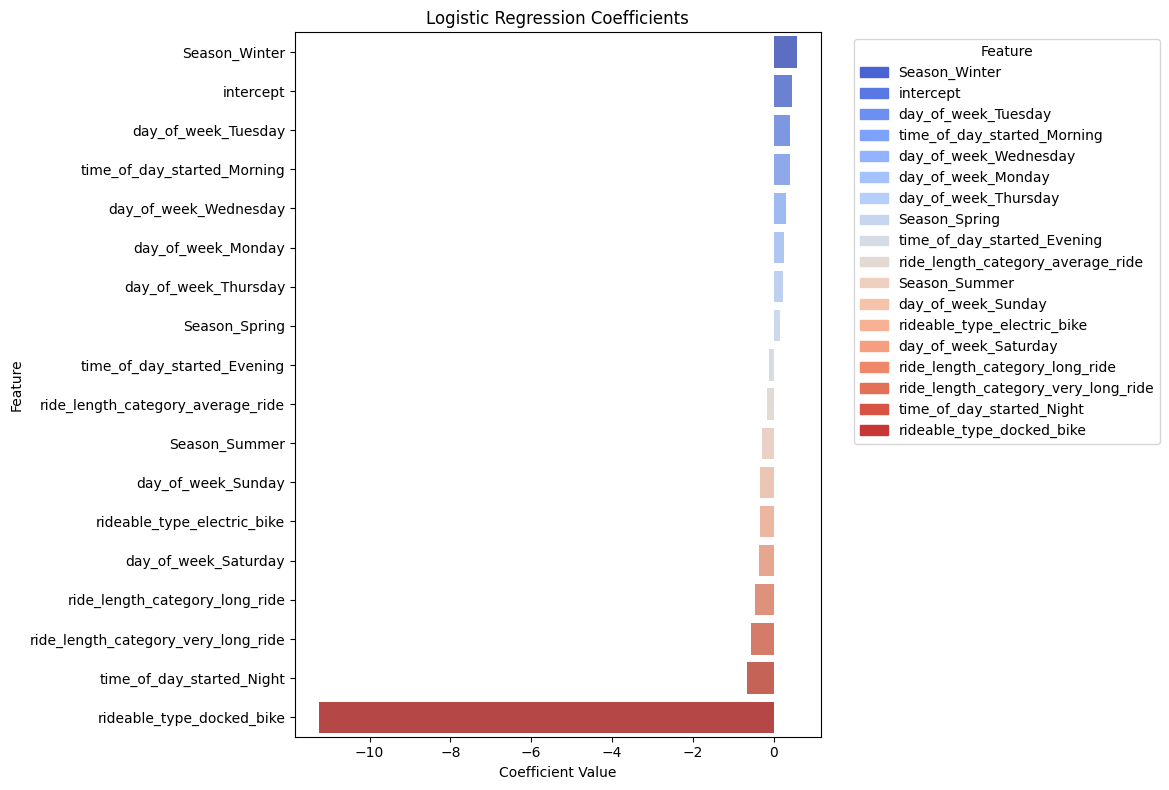

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided coefficients
coefficients = {
    'Feature': [
        'rideable_type_docked_bike', 'rideable_type_electric_bike',
        'time_of_day_started_Evening', 'time_of_day_started_Morning',
        'time_of_day_started_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter',
        'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
        'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
        'intercept'
    ],
    'Coefficient': [
        -11.25586, -0.344759,
        -0.110029, 0.395413,
        -0.655896, -0.163812,
        -0.468604, -0.554528,
        0.16693, -0.294927, 0.579111,
        0.24608, -0.372322, -0.332397,
        0.243333, 0.412679, 0.306937,
        0.4655881815145885
    ]
}

# Convert to DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

###**Cluster 1**

<ipython-input-26-f848afe63468>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


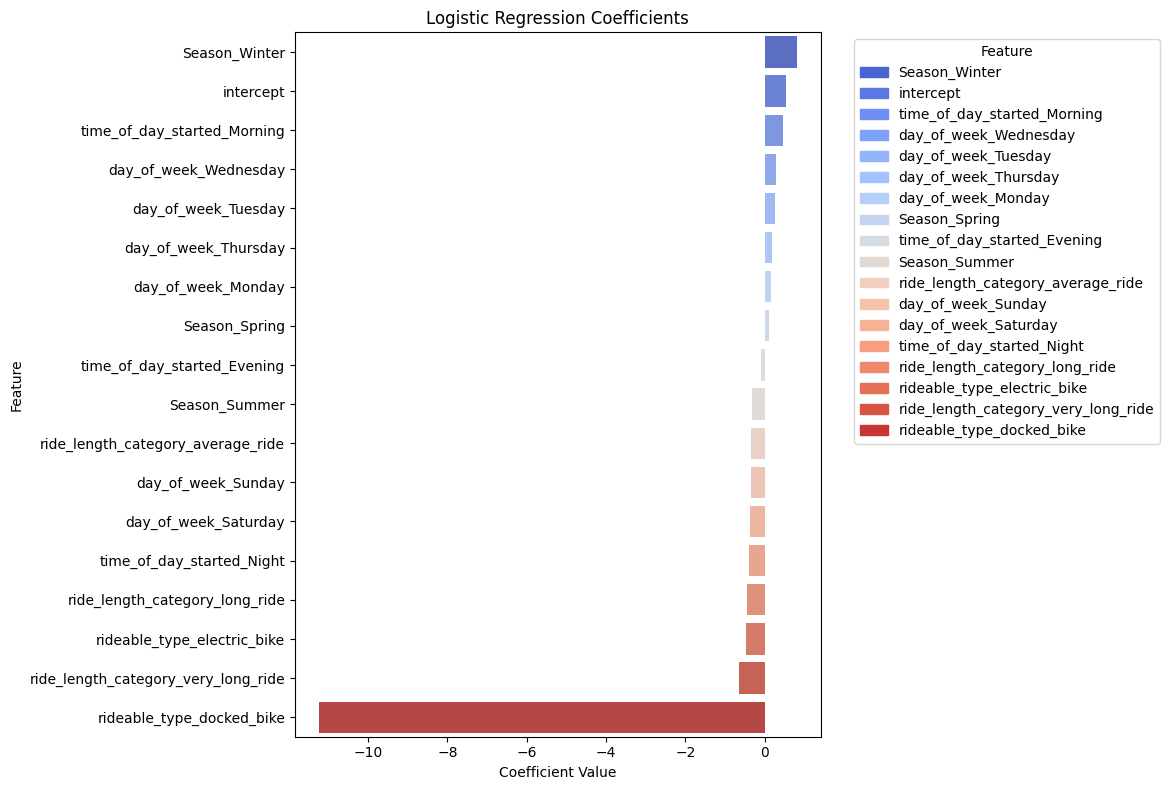

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided coefficients
coefficients = {
    'Feature': [
        'intercept',
        'rideable_type_docked_bike', 'rideable_type_electric_bike',
        'time_of_day_started_Evening', 'time_of_day_started_Morning',
        'time_of_day_started_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter',
        'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
        'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'
    ],
    'Coefficient': [
        0.539105366069755, -11.239638, -0.470552,
        -0.083546, 0.463309,
        -0.387581, -0.350905,
        -0.438765, -0.656804,
        0.109392, -0.320468, 0.814917,
        0.149687, -0.362976, -0.353715,
        0.189465, 0.26082, 0.290898
    ]
}

# Convert to DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



###**Cluster 2**

<ipython-input-23-484131225a82>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


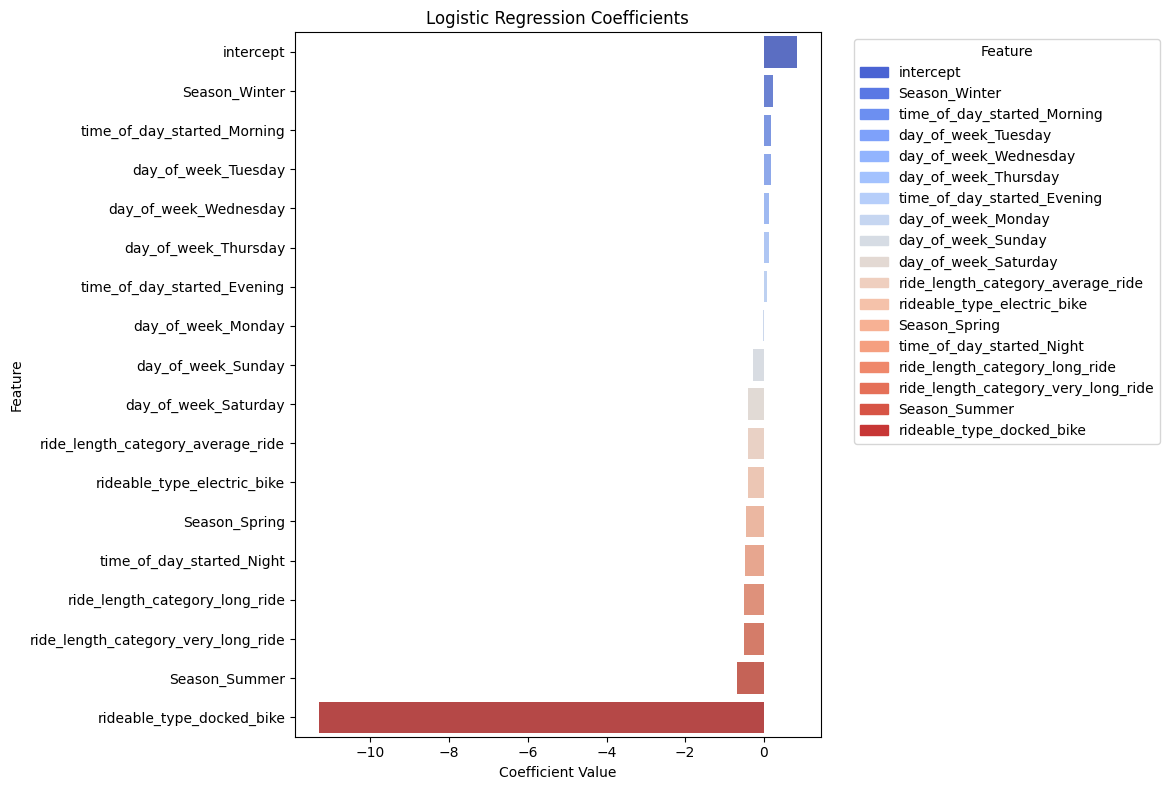

In [23]:
# Given coefficients and features from the image provided by the user
coefficients = {
    'Feature': [
        'intercept', 'rideable_type_docked_bike', 'rideable_type_electric_bike',
        'time_of_day_started_Evening', 'time_of_day_started_Morning',
        'time_of_day_started_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter',
        'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
        'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'
    ],
    'Coefficient': [
        0.84184032774146, -11.312881, -0.403988,
        0.075923, 0.178145,
        -0.470946, -0.39783,
        -0.502015, -0.510734,
        -0.450186, -0.677305, 0.224168,
        -0.015533, -0.39448, -0.266198,
        0.133068, 0.168016, 0.14107
    ]
}

# Convert to DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



### **Cluster 3**

<ipython-input-24-cfab1e68bdcf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


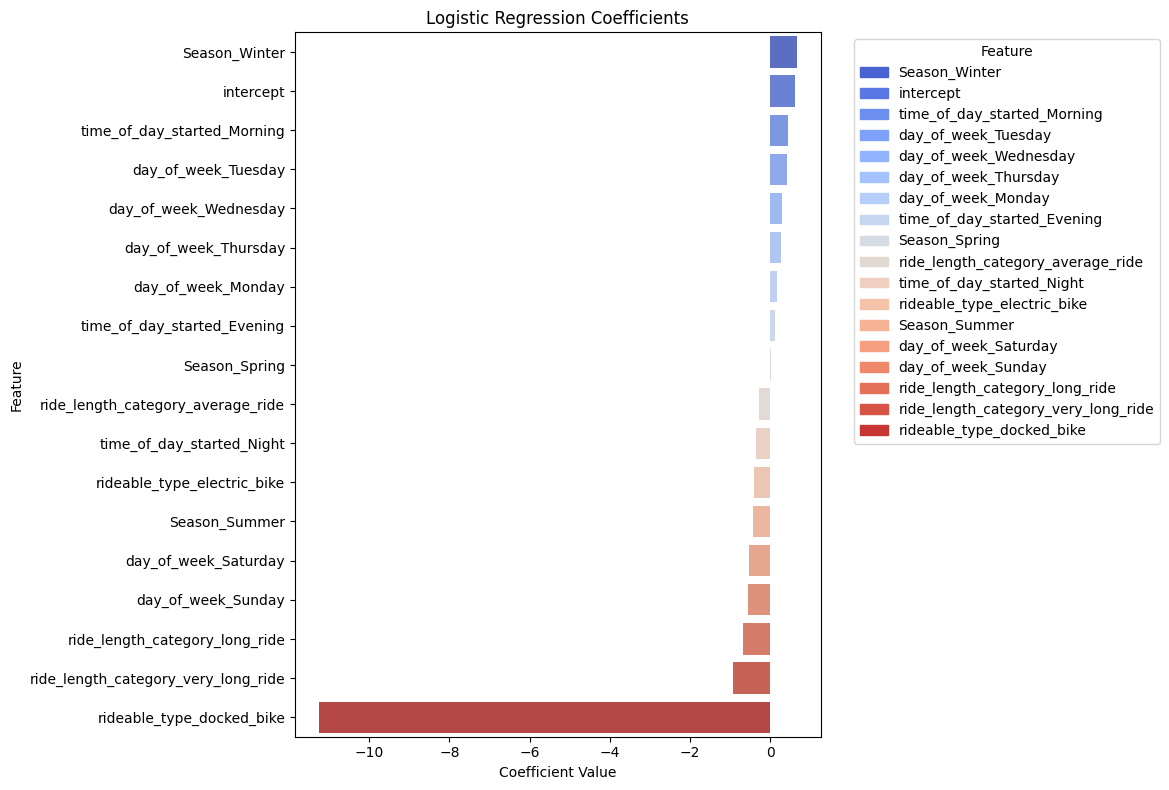

In [24]:
# Updated coefficients and features from the provided image
coefficients = {
    'Feature': [
        'intercept',
        'rideable_type_docked_bike', 'rideable_type_electric_bike',
        'time_of_day_started_Evening', 'time_of_day_started_Morning',
        'time_of_day_started_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter',
        'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
        'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'
    ],
    'Coefficient': [
        0.616066937198343, -11.255527, -0.409152,
        0.117681, 0.452261,
        -0.349779, -0.270972,
        -0.680064, -0.91377,
        0.018621, -0.433374, 0.670595,
        0.161938, -0.534807, -0.554336,
        0.282675, 0.420582, 0.285262
    ]
}

# Convert the dictionary to a DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


###**Cluster 4**

<ipython-input-25-b32455acbbd3>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


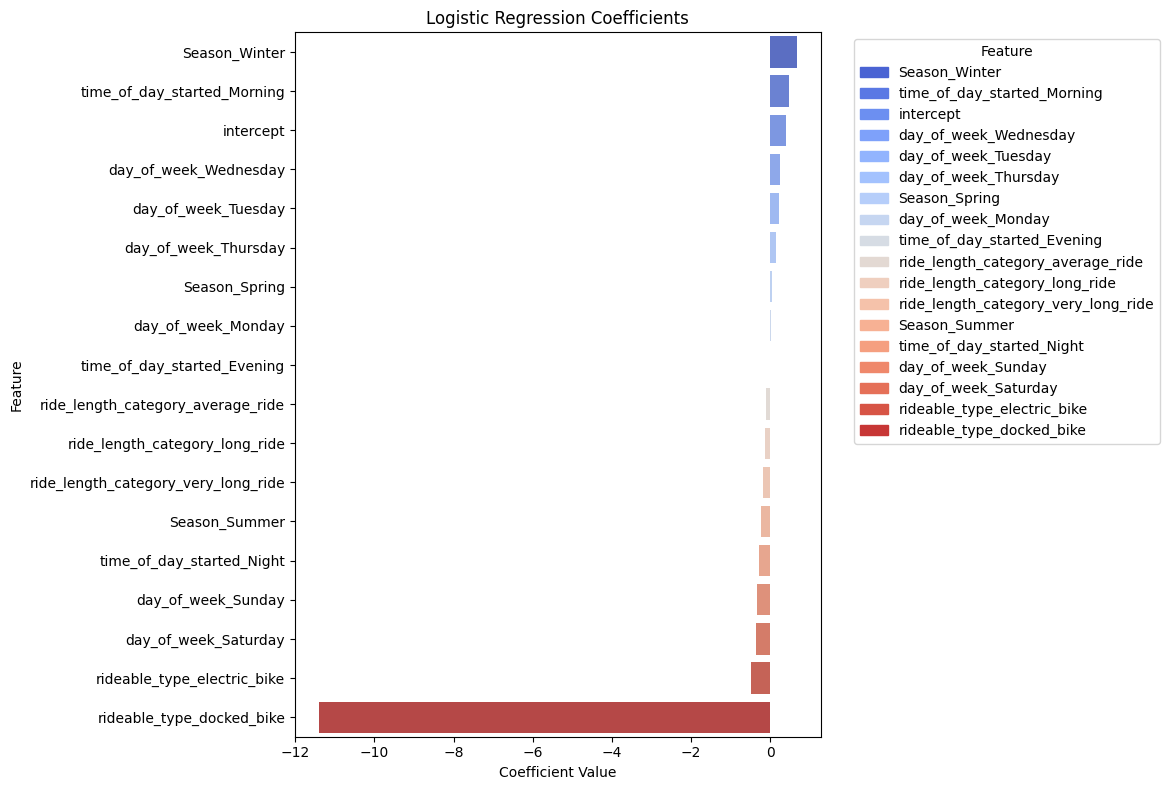

In [25]:
# New coefficients and features from the provided image
coefficients = {
    'Feature': [
        'intercept',
        'rideable_type_docked_bike', 'rideable_type_electric_bike',
        'time_of_day_started_Evening', 'time_of_day_started_Morning',
        'time_of_day_started_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter',
        'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
        'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'
    ],
    'Coefficient': [
        0.3970908429335237, -11.402883, -0.489619,
        -0.014979, 0.4588,
        -0.290981, -0.114539,
        -0.133943, -0.185246,
        0.037824, -0.242335, 0.673934,
        0.026517, -0.362144, -0.330322,
        0.153948, 0.222021, 0.245321
    ]
}

# Convert to DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
